
<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Escudo-UdeA.svg/970px-Escudo-UdeA.svg.png" width="300" height="300">
</div>

# **MODELO DE PREDICCIÓN DE TIEMPO DE ESPERA DE LOS ASEGURADOS EN INCIDENTES DE TRÁNSITO**

# **ESTUDIANTES**

# **Diego Fernando Londoño Londoño**

# **Yenny Patricia Vergara Monsalve**

# **1. DESCRIPCIÓN DEL PROYECTO**


El presente proyecto tiene como objetivo desarrollar un modelo predictivo que estime el tiempo de espera de un asegurado tras reportar un accidente de tránsito, con el fin de optimizar los procesos de atención y mejorar la experiencia del cliente en una compañía aseguradora.

La iniciativa surge de la necesidad de contar con herramientas analíticas que permitan anticipar demoras y gestionar de forma eficiente los recursos disponibles en campo, como gestores de siniestros y unidades móviles.

Para ello, se utilizó un conjunto de datos históricos de siniestros, registrados por la aseguradora a través de sus sistemas de gestión durante un período determinado. Estos datos incluyen variables relacionadas con la ubicación, hora del incidente, tipo de accidente, tráfico, disponibilidad de personal y otros factores relevantes como el clima y la distancia.

Se implementó un proceso iterativo que incluyó limpieza, análisis exploratorio, selección de variables y entrenamiento de distintos modelos de machine learning como regresión lineal, árboles de decisión y random forest, evaluando su desempeño mediante métricas como el MAE y el RMSE.

Entre los principales obstáculos se encontraron problemas de calidad de datos, presencia de valores atípicos y desequilibrios en la distribución de los tiempos de atención.

Los resultados obtenidos muestran que el modelo tiene un desempeño aceptable para predecir tiempos de espera con un margen de error razonable, y representa una herramienta valiosa para la toma de decisiones operativas en tiempo real.


# **2. OBJETIVOS**


**Objetivo del Proyecto**

Predecir el tiempo de espera en la atención de un asegurado durante una incidencia de tránsito, desarrollando un modelo de Machine Learning con el fin de brindar soporte al proceso del gestor de seguros.

**Objetivos Específicos**

•	Realizar un análisis exploratorio y limpieza de datos provenientes de los datos históricos de siniestros para identificar patrones, inconsistencias y variables relevantes.

•	Construir variables derivadas (ingeniería de características) que integren factores espaciales, temporales y contextuales como clima, tráfico, distancia, entre otros.

•	Entrenar y comparar modelos de aprendizaje automático para estimar el tiempo de espera, evaluando su desempeño con métricas como MAE, RMSE y R2

•	Seleccionar el modelo con mejor desempeño y validar su capacidad predictiva para su futura integración en los sistemas de gestión de siniestros de la aseguradora.

•	Emitir el conjunto de recomendaciones correspondientes que permitan mejorar el rendimiento del modelo seleccionado en etapas posteriores de la investigación



# **3. IMPORTACIÓN DE LIBRERÍAS**

## **3.1. Librerias y configuraciones previas**

In [40]:
# Gestion de librerias
# ==============================================================================
import numpy as np
import pandas as pd
import math
from importlib import reload

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib

# Preprocesado y modelado
# ==============================================================================

#creación de modelos
from sklearn.ensemble import GradientBoostingRegressor

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import multiprocessing

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from rich import print

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Instalar libereria
!pip install category_encoders

## **3.2. Funciones**

In [41]:
# Función para graficar atributos en barras, pair plot o box-plot
def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):
    '''
    Función para graficar atributos en barras, pair plot o box-plot.
        Parameters:
            ncols       [integer]    Number of columns for subplots.
            data        [dataframe]  Features dataframe.
            columns     [list]       List of names of featutes in dataframe to plot.
            target_var  [string]     Name of column of target variable or feature.
            plot_type   [string]     Name of graphic. [countplot, boxplt or scatterplot]
            title       [string]     Title for figure
            rot         [integer]    Rotation angle for x axis labels
        Returns:
            Plot of figure

    Ejemplos:
        multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)
        multiple_plot(1, d , 'purpose', 'age_yrs', 'boxplot', 'Distribución de la variable próposito vs la edad',90)
        multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)
        multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)
        multiple_plot(3, d , catCols, 'age_yrs', 'boxplot', 'Distribución de la variables categóticas vs. la edad',30)
    '''


    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            zorder=1
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")

        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot

# **4. CARGA DE DATOS**

## **4.1. Carga del dataset**

In [ ]:
# Cargar dataset final para el procesamiento
# ==============================================================================
import pandas as pd

archivo = "https://github.com/ferdilo04/Monografia_EACD/raw/refs/heads/main/DataSet/DataSet_PREDITIMESACC_V4.xlsx"
df = pd.read_excel(archivo)

# Ver estructura básica
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head(3))

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

Dimensiones del dataset:
(8967, 31)

Primeras filas:

,idproceso,placa,fecha,fechallegada,annoregistro,mesregistro,diaregistro,horaregistro,diasemana,annoatencion,...,Acuerdo,UsuarioRegistra,LiberaVehiculo,ResultadoFallo,Aseguradora,Abogadounico,RandomAbogado,Decripcion,Lluvia,distancia
0,1113,MOY664,2016-06-08 09:20:16.223,2016-06-08 09:20:16.223,2016,6,8,9,Miercoles,2016.0,...,NaN,Juan Felipe Hoyos Botero,NaN,NaN,Liberty Seguros SA,Juan Felipe Hoyos Botero,ELSA ROSA VEGA LOPEZ,Liberty <br>PRELIMINAR <br>LESIONES <br>ASIG 0...,No,8482.615228
1,1114,TSZ179,2016-06-08 11:56:02.857,2016-06-08 11:56:02.857,2016,6,8,11,Miercoles,2016.0,...,NaN,Elkin Lezcano,NaN,NaN,Asegurado,Juan Felipe Hoyos Botero,Juan Felipe Hoyos Botero,Liberty <br>Lesiones <br>Andres GARCES <br>313...,No,8486.581225
2,1115,STW598,2016-06-08 14:03:49.283,2016-06-08 14:03:49.283,2016,6,8,14,Miercoles,2016.0,...,NaN,Elkin Lezcano,NaN,NaN,Asegurado,Juan Felipe Hoyos Botero,ELSA ROSA VEGA LOPEZ,Liberty <br>SIMPLE <br>Jorge VELEZ <br>3192538...,No,8482.832639


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

## **4.2. Comprensión de los Datos**


Se realizó un análisis exploratorio sobre el conjunto de datos proporcionado por la empresa AsisNet, que contiene información detallada de accidentes de tránsito atendidos,los datos son proporcionados son partir del **mes de abril del 2016 al 11 de mayo del 2025**.

El DataSet tiene el nombre **DataSet_PREDITIMESACC_V4.xlsx** y se encuentra en formato de excel con extensión .xlsx , con un tamaño de **3.330 Kb** el cual contiene **8967** registros y **31** variables , la información del dataset fue obtenida mediante una consulta Transat SQL en un servidor de base de datos SQL Server, que contiene información de las incidencias de tránsito y de las gestiones de atención realizadas por los agentes de las aseguradoras suscritas a la empresa AsisNet .


**A continuación una descripción de las variables:**

****

| Columna           | Descripción                                                                 | Ejemplo                     |
|-------------------|------------------------------------------------------------------------------|-----------------------------|
| idproceso         | Código para identificar el caso                                              | 10                          |
| placa             | Placa del vehículo                                                           | BQX320                      |
| fecha             | Fecha en que se reporta el accidente                                         | 2025-05-02 10:40:25         |
| fechallegada      | Fecha en que se llega al sitio donde ocurrió el accidente                   | 2025-05-02 10:50:25         |
| annoregistro      | Año en que se reporta el accidente                                           | 2025                        |
| mesregistro       | Mes en que se reporta el accidente                                           | 5                           |
| diaregistro       | Día en que se reporta el accidente                                           | 2                           |
| horaregistro      | Hora en que se reporta el accidente                                          | 10                          |
| diasemana         | Día de la semana en que se reporta el accidente                              | Lunes                       |
| annoatencion      | Año en que se llega al sitio donde ocurrió el accidente                     | 2025                        |
| mesatencion       | Mes en que se llega al sitio donde ocurrió el accidente                     | 5                           |
| diaatencion       | Día en que se llega al sitio donde ocurrió el accidente                     | 2                           |
| Horaantencion     | Hora en que se llega al sitio donde ocurrió el accidente                    | 10                          |
| TiempoAtencion    | Diferencia en minutos entre el reporte y la llegada                         |                             |
| HoraPicoTarde     | ¿Ocurrió en hora pico de la tarde (5 a 7 pm)? (Sí/No)                       | Si                          |
| HoraPicoManana    | ¿Ocurrió en hora pico de la mañana (6:30 a 8:30 am)? (Sí/No)                | No                          |
| InicioNoche       | ¿Ocurrió entre las 7 pm y 11:59 pm? (Sí/No)                                 | No                          |
| Amanecer          | ¿Ocurrió entre las 12 am y 5:59 am? (Sí/No)                                 | Si                          |
| Municipio         | Municipio donde ocurrió el accidente                                         | No                          |
| Intsancia         | Tipo de accidente reportado por la aseguradora                              | Preliminar con lesiones     |
| clienteimportante | Si el asegurado es cliente importante                                       | Banco de accidente          |
| Acuerdo           | Al acuerdo que se llega entre las partes implicadas                         | Tránsito                    |
| UsuarioRegistra   | Usuario que registra el caso en el sistema                                   | Carolina Garcia Valencia    |
| LiberaVehiculo    | Si el vehículo fue retenido y luego liberado                                | Liberado                    |
| ResultadoFallo    | Si el fallo en audiencias es a favor o en contra                            | A favor                     |
| Aseguradora       | Aseguradora que reporta el accidente                                        | Liberty Seguros             |
| Abogadounico      | Abogado disponible para atender el caso                                     | Carolina Garcia Valencia    |
| RandomAbogado     | Abogado que finalmente atiende el caso                                      | Carolina Garcia Valencia    |
| LLuvia     | Indica si en esa fecha y horario estuvo lloviendo                                      | No   |
| Distancia     | Distancia en metros que hay entre el la ubicación del abogado y el lugar de la incidencia                                     | 8482,61522842257   |


# **5. FASE DE LIMPIEZA Y PREPROCESAMIENTO DE DATOS**



## **5.1. Inspección y Carga Inicial**

In [ ]:
# Inspección inicial
print("\n\n Dimensiones del dataset:\n\n", df.shape)
print("\n Tipos de datos:")
print(df.dtypes)

print("\n\n Vista general: \n\n")
display(df.head(5))

# Resumen estadístico de variables numéricas
display(df.describe())


Dimensiones del dataset:


(8967, 31)

Tipos de datos:

idproceso              int64
placa                 object
fecha                 object
fechallegada          object
annoregistro           int64
mesregistro            int64
diaregistro            int64
horaregistro           int64
diasemana             object
annoatencion         float64
mesatencion          float64
diaatencion          float64
Horaantencion        float64
TiempoAtencion       float64
HoraPicoTarde         object
HoraPicoManana        object
InicioNoche           object
Amanecer              object
Municipio             object
Instancia             object
clienteimportante     object
Acuerdo               object
UsuarioRegistra       object
LiberaVehiculo        object
ResultadoFallo        object
Aseguradora           object
Abogadounico          object
RandomAbogado         object
Decripcion            object
Lluvia                object
distancia            float64
dtype: object

Vista general:

,idproceso,placa,fecha,fechallegada,annoregistro,mesregistro,diaregistro,horaregistro,diasemana,annoatencion,...,Acuerdo,UsuarioRegistra,LiberaVehiculo,ResultadoFallo,Aseguradora,Abogadounico,RandomAbogado,Decripcion,Lluvia,distancia
0,1113,MOY664,2016-06-08 09:20:16.223,2016-06-08 09:20:16.223,2016,6,8,9,Miercoles,2016.0,...,NaN,Juan Felipe Hoyos Botero,NaN,NaN,Liberty Seguros SA,Juan Felipe Hoyos Botero,ELSA ROSA VEGA LOPEZ,Liberty <br>PRELIMINAR <br>LESIONES <br>ASIG 0...,No,8482.615228
1,1114,TSZ179,2016-06-08 11:56:02.857,2016-06-08 11:56:02.857,2016,6,8,11,Miercoles,2016.0,...,NaN,Elkin Lezcano,NaN,NaN,Asegurado,Juan Felipe Hoyos Botero,Juan Felipe Hoyos Botero,Liberty <br>Lesiones <br>Andres GARCES <br>313...,No,8486.581225
2,1115,STW598,2016-06-08 14:03:49.283,2016-06-08 14:03:49.283,2016,6,8,14,Miercoles,2016.0,...,NaN,Elkin Lezcano,NaN,NaN,Asegurado,Juan Felipe Hoyos Botero,ELSA ROSA VEGA LOPEZ,Liberty <br>SIMPLE <br>Jorge VELEZ <br>3192538...,No,8482.832639
3,1116,TSE057,2016-06-08 18:29:41.737,2016-06-08 18:29:41.737,2016,6,8,18,Miercoles,2016.0,...,Tránsito,Elkin Lezcano,NaN,NaN,Asegurado,Juan Felipe Hoyos Botero,Carolina Garcia Valencia,ATENDIO JHON JAIRO TABARES <br><br>Liberty <br...,No,8639.194598
4,1117,USX686,2016-06-08 19:46:18.653,2016-06-08 19:46:18.653,2016,6,8,19,Miercoles,2016.0,...,NaN,Elkin Lezcano,NaN,NaN,Asegurado,Juan Felipe Hoyos Botero,SEBASTIAN LOPEZ GOMEZ,Liberty <br>SIMPLE <br>Calle 33 x av regional ...,No,8482.415758


,idproceso,annoregistro,mesregistro,diaregistro,horaregistro,annoatencion,mesatencion,diaatencion,Horaantencion,TiempoAtencion,distancia
count,8967.000000,8967.000000,8967.000000,8967.000000,8967.000000,8040.000000,8040.00000,8040.000000,8040.000000,8040.00000,8967.000000
mean,44100.845322,2020.194268,6.805063,15.930523,14.055425,2020.020647,6.80398,15.817040,14.583831,2976.15510,8484.481152
std,14001.798155,2.342271,3.555137,8.838929,4.707902,2.276523,3.52199,8.863927,5.107983,27272.73376,304.845399
min,1113.000000,2016.000000,1.000000,1.000000,0.000000,2016.000000,1.00000,1.000000,0.000000,0.00000,1759.926915
25%,39714.500000,2018.000000,4.000000,8.000000,11.000000,2018.000000,4.00000,8.000000,11.000000,12.00000,8482.191998
50%,47688.000000,2021.000000,7.000000,16.000000,14.000000,2020.000000,7.00000,16.000000,15.000000,28.00000,8483.506851
75%,54832.500000,2022.000000,10.000000,24.000000,18.000000,2022.000000,10.00000,23.000000,19.000000,225.25000,8486.799330
max,58954.000000,2025.000000,12.000000,31.000000,23.000000,2025.000000,12.00000,31.000000,23.000000,878976.00000,13230.957749


## **5.2. Tratamiento de valores nulos**

ANÁLISIS INICIAL DE VALORES NULOS:

- Total de columnas: 31

- Columnas a eliminar (> 80% nulos): 3

- Columnas a imputar (≤ 80% nulos): 10

Columnas eliminadas: ['clienteimportante', 'LiberaVehiculo', 'ResultadoFallo']

Columnas imputadas:

Numéricas (mediana): ['annoatencion', 'mesatencion', 'diaatencion', 'Horaantencion', 'TiempoAtencion']

Categóricas (moda): ['fechallegada', 'Acuerdo', 'Aseguradora', 'Abogadounico', 'Lluvia']

Verificación final:

Total de valores nulos restantes: 0

No quedan valores nulos después del tratamiento.

<Figure size 1000x600 with 0 Axes>

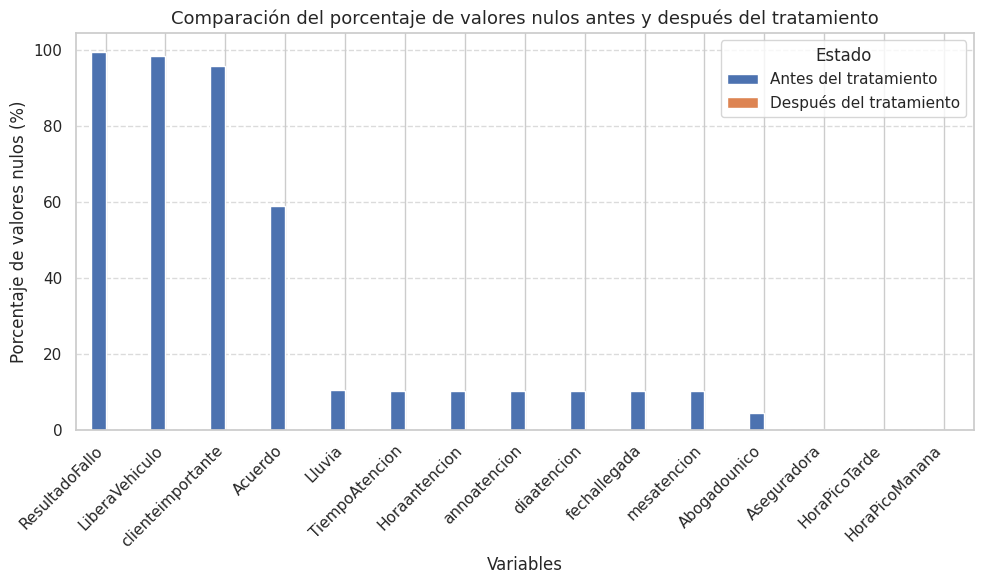

RESUMEN DEL TRATAMIENTO DE VALORES NULOS:

Aspecto  Resultado
0             Columnas eliminadas          3
1  Columnas imputadas con mediana          5
2     Columnas imputadas con moda          5
3         Valores nulos restantes          0

In [ ]:
# ============================================================
#  TRATAMIENTO AUTOMÁTICO DE VALORES NULOS + GRÁFICA COMPARATIVA
# ============================================================

def tratamiento_valores_nulos(df, umbral_eliminacion=0.8, verbose=True):
    """
    Realiza el tratamiento automático de valores nulos:
    1️ Elimina columnas con más del umbral definido de nulos.
    2️ Imputa valores faltantes con la mediana (numéricas) o la moda (categóricas).
    3️ Verifica y reporta los resultados del proceso.
    4️ Muestra una gráfica comparativa del porcentaje de nulos antes y después.

    Parámetros:
    - df: DataFrame original
    - umbral_eliminacion: porcentaje máximo permitido de nulos (0.8 = 80%)
    - verbose: si True, imprime reportes detallados

    Retorna:
    - df_limpio: DataFrame tratado
    - reporte: diccionario con información del proceso
    """

    # Copiar para no modificar el original
    df_limpio = df.copy()

    # =========================
    # 1️ Cálculo de nulos iniciales
    # =========================
    nulos_inicial = df_limpio.isnull().mean() * 100

    # Identificación de columnas según umbrales
    cols_eliminar = nulos_inicial[nulos_inicial > umbral_eliminacion * 100].index.tolist()
    cols_imputar = nulos_inicial[(nulos_inicial > 0) & (nulos_inicial <= umbral_eliminacion * 100)].index.tolist()

    if verbose:
        print("\n ANÁLISIS INICIAL DE VALORES NULOS:")
        print(f" - Total de columnas: {df.shape[1]}")
        print(f" - Columnas a eliminar (> {umbral_eliminacion*100:.0f}% nulos): {len(cols_eliminar)}")
        print(f" - Columnas a imputar (≤ {umbral_eliminacion*100:.0f}% nulos): {len(cols_imputar)}")

    # =========================
    # 2️ Eliminación de columnas con demasiados nulos
    # =========================
    if cols_eliminar:
        df_limpio.drop(columns=cols_eliminar, inplace=True)
        if verbose:
            print(f"\n Columnas eliminadas: {cols_eliminar}")
    else:
        if verbose:
            print("\n No se eliminaron columnas (ninguna supera el umbral de nulos).")

    # =========================
    # 3️ Imputación de valores faltantes
    # =========================
    imputadas_media = []
    imputadas_moda = []

    for col in cols_imputar:
        if col in df_limpio.columns:  # Evitar errores si fue eliminada
            if pd.api.types.is_numeric_dtype(df_limpio[col]):
                df_limpio[col].fillna(df_limpio[col].median(), inplace=True)
                imputadas_media.append(col)
            elif pd.api.types.is_object_dtype(df_limpio[col]) or pd.api.types.is_categorical_dtype(df_limpio[col]):
                moda_val = df_limpio[col].mode()
                if not moda_val.empty:
                    df_limpio[col].fillna(moda_val[0], inplace=True)
                    imputadas_moda.append(col)

    if verbose:
        print("\n Columnas imputadas:")
        if imputadas_media:
            print(f"    Numéricas (mediana): {imputadas_media}")
        if imputadas_moda:
            print(f"    Categóricas (moda): {imputadas_moda}")
        if not imputadas_media and not imputadas_moda:
            print("   Ninguna columna fue imputada.")

    # =========================
    # 4️ Verificación final
    # =========================
    nulos_final = df_limpio.isnull().mean() * 100
    nulos_restantes = df_limpio.isnull().sum().sum()

    if verbose:
        print("\n Verificación final:")
        print(f"   Total de valores nulos restantes: {nulos_restantes}")
        if nulos_restantes == 0:
            print("    No quedan valores nulos después del tratamiento.")
        else:
            print("    Aún existen valores nulos en algunas columnas.")
            display(df_limpio.isnull().sum()[df_limpio.isnull().sum() > 0])

    # =========================
    # 5️ Gráfica comparativa antes y después
    # =========================
    comparacion = pd.DataFrame({
        'Antes del tratamiento': nulos_inicial,
        'Después del tratamiento': nulos_final
    }).fillna(0)

    comparacion_top = comparacion.sort_values('Antes del tratamiento', ascending=False).head(15)

    plt.figure(figsize=(10, 6))
    comparacion_top.plot(kind='bar', figsize=(10,6))
    plt.title('Comparación del porcentaje de valores nulos antes y después del tratamiento', fontsize=13)
    plt.xlabel('Variables')
    plt.ylabel('Porcentaje de valores nulos (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Estado', loc='upper right')
    plt.tight_layout()
    plt.show()

    # =========================
    # 6️ Reporte resumen
    # =========================
    reporte = {
        "columnas_eliminadas": cols_eliminar,
        "columnas_imputadas_media": imputadas_media,
        "columnas_imputadas_moda": imputadas_moda,
        "total_nulos_restantes": nulos_restantes
    }

    return df_limpio, reporte


# ============================================================
#  EJECUCIÓN DEL PROCESO
# ============================================================

df_limpio, reporte_nulos = tratamiento_valores_nulos(df, umbral_eliminacion=0.8)

# Mostrar resumen final del proceso
print("\n RESUMEN DEL TRATAMIENTO DE VALORES NULOS:")
print(pd.DataFrame({
    "Aspecto": [
        "Columnas eliminadas",
        "Columnas imputadas con mediana",
        "Columnas imputadas con moda",
        "Valores nulos restantes"
    ],
    "Resultado": [
        len(reporte_nulos['columnas_eliminadas']),
        len(reporte_nulos['columnas_imputadas_media']),
        len(reporte_nulos['columnas_imputadas_moda']),
        reporte_nulos['total_nulos_restantes']
    ]
}))



## **5.3. Identificación y tratamiento de Valores únicos (Cardinalidad)**

===== TABLA RESUMEN DE VALORES ÚNICOS =====

,Variable,Valores Únicos,Porcentaje Únicos (%),Tipo de Dato
0,idproceso,8967,100.00%,int64
1,fecha,8967,100.00%,object
2,Decripcion,8939,99.69%,object
3,placa,8346,93.07%,object
4,fechallegada,8040,89.66%,int64
5,distancia,1932,21.55%,int64
6,TiempoAtencion,1847,20.60%,int64
7,Abogadounico,74,0.83%,int64
8,diaatencion,31,0.35%,object
9,diaregistro,31,0.35%,float64


INTERPRETACIÓN DE RESULTADOS:

Variables con cardinalidad adecuada (23):

[
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'horaregistro',
    'diasemana',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'Horaantencion',
    'HoraPicoTarde',
    'HoraPicoManana',
    'InicioNoche',
    'Amanecer',
    'Municipio',
    'Instancia',
    'clienteimportante',
    'Acuerdo',
    'UsuarioRegistra',
    'LiberaVehiculo',
    'ResultadoFallo',
    'Aseguradora',
    'RandomAbogado',
    'Lluvia'
]

Variables con ALTA cardinalidad (> 50 valores únicos):

['idproceso', 'fecha', 'Decripcion', 'placa', 'fechallegada', 'distancia', 'TiempoAtencion', 'Abogadounico']

Estas variables pueden requerir codificación especial (Target Encoding o Embeddings).

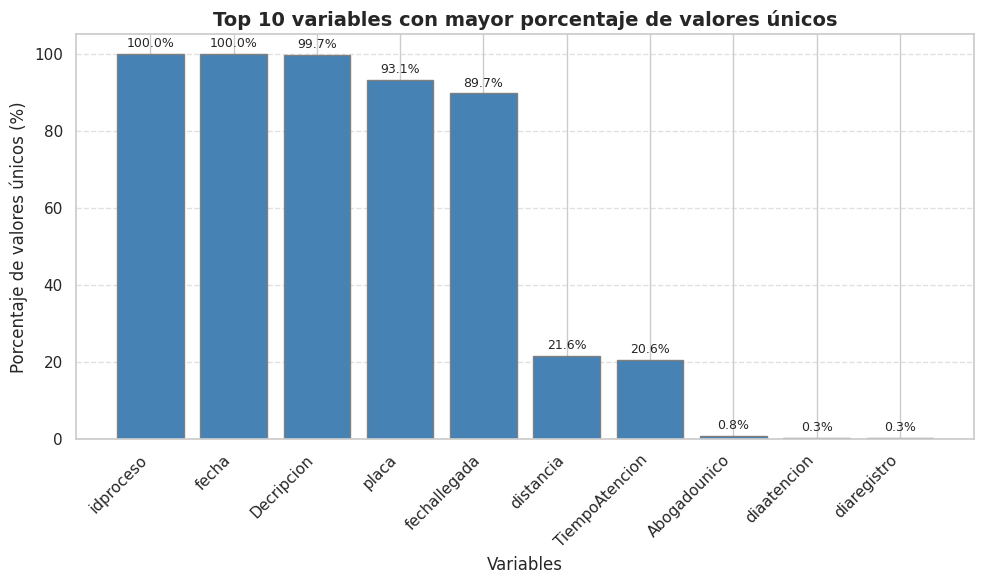

In [ ]:
# =====================================================
# ANÁLISIS Y TRATAMIENTO DE VALORES ÚNICOS (CARDINALIDAD)
# =====================================================
# Calcular cantidad y porcentaje de valores únicos
valores_unicos = df.nunique().sort_values(ascending=False)
tabla_cardinalidad = pd.DataFrame({
    'Variable': valores_unicos.index,
    'Valores Únicos': valores_unicos.values,
    'Porcentaje Únicos (%)': (valores_unicos.values / len(df) * 100).round(2),
    'Tipo de Dato': df.dtypes.values
})

# Mostrar tabla con estilo visual
print("\n===== TABLA RESUMEN DE VALORES ÚNICOS =====")
display(
    tabla_cardinalidad.style
        .format({'Porcentaje Únicos (%)': '{:.2f}%'})
        .background_gradient(cmap='Blues', subset=['Valores Únicos', 'Porcentaje Únicos (%)'])
)

# =====================================================
# CLASIFICACIÓN DE VARIABLES SEGÚN CARDINALIDAD
# =====================================================

# Umbrales configurables
umbral_baja = 1     # sin variación
umbral_alta = 50    # más de 50 categorías se considera alta cardinalidad (ajustable)

# Identificar categorías
sin_variacion = tabla_cardinalidad[tabla_cardinalidad['Valores Únicos'] <= umbral_baja]['Variable'].tolist()
alta_card = tabla_cardinalidad[tabla_cardinalidad['Valores Únicos'] > umbral_alta]['Variable'].tolist()
cardinalidad_media = [col for col in df.columns if col not in sin_variacion + alta_card]

# =====================================================
# INTERPRETACIÓN AUTOMÁTICA
# =====================================================
print("\n INTERPRETACIÓN DE RESULTADOS:")

print(f"\n Variables con cardinalidad adecuada ({len(cardinalidad_media)}):")
print(cardinalidad_media if cardinalidad_media else "Ninguna")

if alta_card:
    print(f"\n Variables con ALTA cardinalidad (> {umbral_alta} valores únicos):")
    print(alta_card)
    print(" Estas variables pueden requerir codificación especial (Target Encoding o Embeddings).")

if sin_variacion:
    print(f"\n Variables SIN VARIACIÓN (1 solo valor): {len(sin_variacion)}")
    print(sin_variacion)
    print(" Serán eliminadas, ya que no aportan información al modelo.")

# =====================================================
# ELIMINAR VARIABLES SIN VARIACIÓN
# =====================================================
if sin_variacion:
    df = df.drop(columns=sin_variacion)
    print(f"\n {len(sin_variacion)} variables sin variación eliminadas correctamente.")

# =====================================================
# VISUALIZACIÓN DEL TOP 10 DE VARIABLES CON MÁS VALORES ÚNICOS
# =====================================================
top10 = tabla_cardinalidad.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top10['Variable'], top10['Porcentaje Únicos (%)'], color='steelblue', edgecolor='gray')

# Añadir etiquetas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', va='bottom', fontsize=9)

# Personalización del gráfico
plt.title("Top 10 variables con mayor porcentaje de valores únicos", fontsize=14, fontweight='bold')
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Porcentaje de valores únicos (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **6.3.1. Tratamiento de Variables Según Cardinalidad**

In [ ]:
# =====================================================
# TRATAMIENTO DE VARIABLES SEGÚN CARDINALIDAD
# =====================================================

# 1. Eliminar variables sin variación
if sin_variacion:
    df.drop(columns=sin_variacion, inplace=True)
    print(f" {len(sin_variacion)} variables sin variación eliminadas.")

# 2. Eliminar o marcar variables de alta cardinalidad
if alta_card:
    # Identificar posibles identificadores (ID, código, placa, etc.)
    posibles_ids = [col for col in alta_card if any(x in col.lower() for x in ['id', 'codigo', 'placa', 'nro'])]

    df.drop(columns=posibles_ids, inplace=True)
    print(f" Se eliminaron {len(posibles_ids)} variables identificadoras de alta cardinalidad: {posibles_ids}")

    # Variables restantes de alta cardinalidad (no identificadores) se pueden codificar con técnicas avanzadas
    restantes = [col for col in alta_card if col not in posibles_ids]
    if restantes:
        print(f" Variables con alta cardinalidad que podrían codificarse (Target/Hash Encoding): {restantes}")
else:
    print(" No se detectaron variables con alta cardinalidad.")


Se eliminaron 2 variables identificadoras de alta cardinalidad: ['idproceso', 'placa']

Variables con alta cardinalidad que podrían codificarse (Target/Hash Encoding): ['fecha', 'Decripcion', 
'fechallegada', 'distancia', 'TiempoAtencion', 'Abogadounico']

In [ ]:
# =====================================================
# TRATAMIENTO DE VARIABLES DE ALTA CARDINALIDAD
# =====================================================

# 1️ FECHAS: convertir en componentes temporales
if {'fecha', 'fechallegada'}.issubset(df.columns):
    for col in ['fecha', 'fechallegada']:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_anio'] = df[col].dt.year
        df[f'{col}_mes'] = df[col].dt.month
        df[f'{col}_dia'] = df[col].dt.day
        df[f'{col}_hora'] = df[col].dt.hour
    df.drop(columns=['fecha', 'fechallegada'], inplace=True)
    print(" Variables 'fecha' y 'fechallegada' transformadas en componentes temporales y eliminadas.")

# 2️ TEXTO LIBRE: descripción
if 'Decripcion' in df.columns:
    print(" 'Decripcion' es texto libre. Puedes aplicar vectorización (TF-IDF) o eliminarla.")
    # Ejemplo: eliminar si no se va a usar NLP
    df.drop(columns=['Decripcion'], inplace=True)
    print(" Variable 'Decripcion' eliminada (texto libre).")

# 3️ VARIABLE OBJETIVO Y CONTINUAS
# 'TiempoAtencion' y 'distancia' se mantienen sin cambios
print(" Variables 'TiempoAtencion' y 'distancia' conservadas (numéricas continuas).")

# 4️ VARIABLES CATEGÓRICAS CON MUCHAS CATEGORÍAS
if 'Abogadounico' in df.columns:
    # Ejemplo de codificación por frecuencia
    frecuencia_abogado = df['Abogadounico'].value_counts(normalize=True)
    df['Abogadounico_freq'] = df['Abogadounico'].map(frecuencia_abogado)
    df.drop(columns=['Abogadounico'], inplace=True)
    print(" Variable 'Abogadounico' transformada con codificación por frecuencia.")


Variables 'fecha' y 'fechallegada' transformadas en componentes temporales y eliminadas.

'Decripcion' es texto libre. Puedes aplicar vectorización (TF-IDF) o eliminarla.

Variable 'Decripcion' eliminada (texto libre).

Variables 'TiempoAtencion' y 'distancia' conservadas (numéricas continuas).

Variable 'Abogadounico' transformada con codificación por frecuencia.

## **5.4. Detección y Tratamiento de Outliers (IQR)**

### **5.4.1. Identificación de Outliers (Método IQR)**

In [ ]:
# ===========================================================
# IDENTIFICACIÓN DE OUTLIERS (Método IQR)
# ===========================================================

# 1️ Seleccionamos solo las variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\n\n [bold] Variables numéricas analizadas: [/bold] \n", list(numeric_cols))

# 2️ Creamos una tabla para registrar resultados
resumen_outliers = []

# 3️ Recorremos cada variable numérica
for col in numeric_cols:
    # Calcular los cuartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contar outliers
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
    n_outliers = outliers.count()
    porcentaje = (n_outliers / len(df)) * 100

    outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()
    print(f"{col}: {outliers} outliers detectados")

    # Agregar resultados
    resumen_outliers.append({
        'Variable': col,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Límite inferior': round(limite_inferior, 2),
        'Límite superior': round(limite_superior, 2),
        'Cantidad outliers': n_outliers,
        '% del total': round(porcentaje, 2)
    })

# 4️ Crear DataFrame con el resumen
tabla_outliers = pd.DataFrame(resumen_outliers)

# 5️ Ordenar de mayor a menor cantidad de outliers
tabla_outliers.sort_values(by='% del total', ascending=False, inplace=True)

# 6️ Mostrar tabla formateada
print("\n\n [bold] ===== DETECCIÓN DE OUTLIERS (Método IQR) =====\n\n [/bold] ")
display(
    tabla_outliers.style.background_gradient(
        cmap='Reds', subset=['% del total']
    ).hide(axis='index')
)



 Variables numéricas analizadas:  

[
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'horaregistro',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'Horaantencion',
    'TiempoAtencion',
    'distancia',
    'fechallegada_anio',
    'fechallegada_mes',
    'fechallegada_dia',
    'fechallegada_hora',
    'Abogadounico_freq'
]

annoregistro: 0 outliers detectados

mesregistro: 0 outliers detectados

diaregistro: 0 outliers detectados

horaregistro: 72 outliers detectados

annoatencion: 0 outliers detectados

mesatencion: 0 outliers detectados

diaatencion: 0 outliers detectados

Horaantencion: 0 outliers detectados

TiempoAtencion: 1590 outliers detectados

distancia: 519 outliers detectados

fechallegada_anio: 0 outliers detectados

fechallegada_mes: 0 outliers detectados

fechallegada_dia: 0 outliers detectados

fechallegada_hora: 0 outliers detectados

Abogadounico_freq: 1609 outliers detectados

 ===== DETECCIÓN DE OUTLIERS (Método IQR) =====

 

Variable,Q1,Q3,IQR,Límite inferior,Límite superior,Cantidad outliers,% del total
Abogadounico_freq,0.020000,0.070000,0.050000,-0.050000,0.140000,1609,17.940000
TiempoAtencion,12.000000,225.250000,213.250000,-307.880000,545.120000,1590,17.730000
distancia,8482.190000,8486.800000,4.610000,8475.280000,8493.710000,519,5.790000
horaregistro,11.000000,18.000000,7.000000,0.500000,28.500000,72,0.800000
diaregistro,8.000000,24.000000,16.000000,-16.000000,48.000000,0,0.000000
mesregistro,4.000000,10.000000,6.000000,-5.000000,19.000000,0,0.000000
annoregistro,2018.000000,2022.000000,4.000000,2012.000000,2028.000000,0,0.000000
diaatencion,8.000000,23.000000,15.000000,-14.500000,45.500000,0,0.000000
mesatencion,4.000000,10.000000,6.000000,-5.000000,19.000000,0,0.000000
annoatencion,2018.000000,2022.000000,4.000000,2012.000000,2028.000000,0,0.000000


### **5.4.2. Análisis y Tratamiento Oultiers en TiempoAtencion**

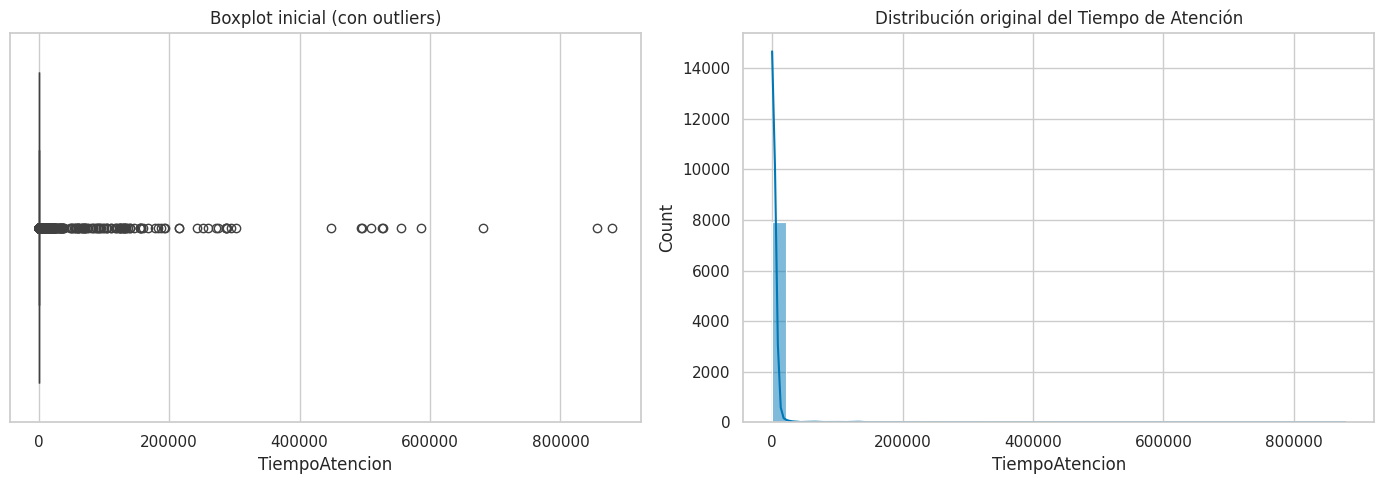

Registros originales: 8040

Registros después de filtrar outliers: 6450 (19.78% eliminados)

\ ===== COMPARATIVO ESTADÍSTICO =====[]/bold

,Estadístico,Antes,Después (Winsorizado)
0,Media,2976.16,52.02
1,Mediana,28.00,21.00
2,Desv. Estándar,27272.73,93.33
3,Mínimo,0.00,0.00
4,Máximo,878976.00,545.00


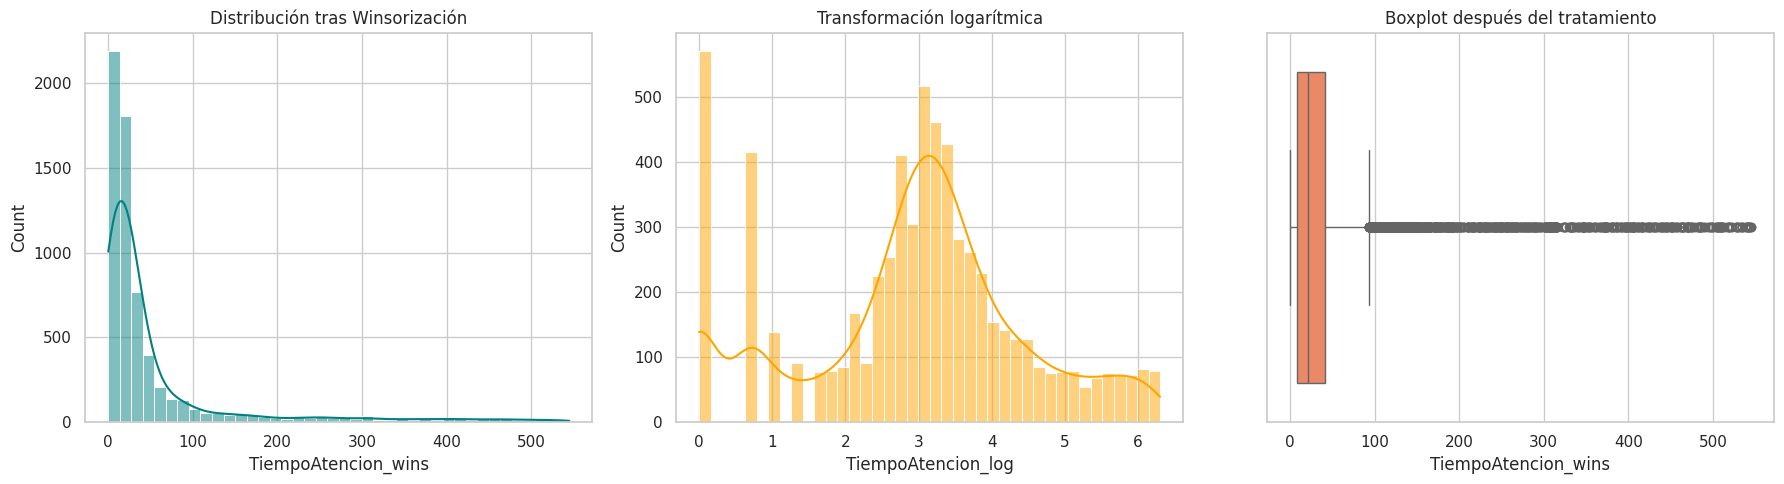

Tratamiento de outliers completado:

- Rango Intercuartílico (IQR): 213.25

- Límite inferior: -307.88

- Límite superior: 545.12

- Variable log-transformada: 'TiempoAtencion_log'

- Variable escalada: 'TiempoAtencion_scaled'

- Registros finales: 6450

In [ ]:
# ================================================================
#  ANÁLISIS Y TRATAMIENTO DE OUTLIERS EN 'TiempoAtencion'
# ================================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# ------------------------------------------------
# 1 Validación de la variable
# ------------------------------------------------
if 'TiempoAtencion' not in df.columns:
    raise KeyError("La columna 'TiempoAtencion' no se encuentra en el DataFrame.")

# Remover nulos si los hay
df = df.copy()
df = df[df['TiempoAtencion'].notna()]

# ------------------------------------------------
# 2️ Cálculo del IQR y límites
# ------------------------------------------------
Q1 = df['TiempoAtencion'].quantile(0.25)
Q3 = df['TiempoAtencion'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# ------------------------------------------------
# 3️ Visualización inicial
# ------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x=df['TiempoAtencion'], ax=ax[0], color='#00b4d8')
ax[0].set_title("Boxplot inicial (con outliers)")

sns.histplot(df['TiempoAtencion'], bins=40, kde=True, ax=ax[1], color='#0077b6')
ax[1].set_title("Distribución original del Tiempo de Atención")
plt.tight_layout()
plt.show()

# ------------------------------------------------
# 4️ Filtrado de valores extremos
# ------------------------------------------------
# Eliminamos valores exageradamente altos (> 1000 min)
df_filtrado = df[df['TiempoAtencion'] <= 1000].copy()

# Aplicamos límites basados en IQR
df_filtrado = df_filtrado[
    (df_filtrado['TiempoAtencion'] >= limite_inferior) &
    (df_filtrado['TiempoAtencion'] <= limite_superior)
].copy()

print(f"Registros originales: {len(df)}")
print(f"Registros después de filtrar outliers: {len(df_filtrado)} "
      f"({(len(df) - len(df_filtrado)) / len(df) * 100:.2f}% eliminados)")

# ------------------------------------------------
# 5️ Winsorización (recorte de valores extremos)
# ------------------------------------------------
df_filtrado['TiempoAtencion_wins'] = np.clip(
    df_filtrado['TiempoAtencion'], limite_inferior, limite_superior
)

# ------------------------------------------------
# 6️ Transformaciones
# ------------------------------------------------
# a) Transformación logarítmica
df_filtrado['TiempoAtencion_log'] = np.log1p(df_filtrado['TiempoAtencion_wins'])

# b) Escalado robusto
scaler = RobustScaler()
df_filtrado['TiempoAtencion_scaled'] = scaler.fit_transform(
    df_filtrado[['TiempoAtencion_wins']]
)

# ------------------------------------------------
# 7️ Comparación estadística antes y después
# ------------------------------------------------
resumen = pd.DataFrame({
    'Estadístico': ['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo'],
    'Antes': [
        df['TiempoAtencion'].mean(),
        df['TiempoAtencion'].median(),
        df['TiempoAtencion'].std(),
        df['TiempoAtencion'].min(),
        df['TiempoAtencion'].max()
    ],
    'Después (Winsorizado)': [
        df_filtrado['TiempoAtencion_wins'].mean(),
        df_filtrado['TiempoAtencion_wins'].median(),
        df_filtrado['TiempoAtencion_wins'].std(),
        df_filtrado['TiempoAtencion_wins'].min(),
        df_filtrado['TiempoAtencion_wins'].max()
    ]
})

print("\n\ [bold]===== COMPARATIVO ESTADÍSTICO =====[]/bold")
display(resumen.round(2))

# ------------------------------------------------
# 8️ Visualización post-tratamiento
# ------------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_filtrado['TiempoAtencion_wins'], bins=40, kde=True, ax=ax[0], color='teal')
ax[0].set_title("Distribución tras Winsorización")

sns.histplot(df_filtrado['TiempoAtencion_log'], bins=40, kde=True, ax=ax[1], color='orange')
ax[1].set_title("Transformación logarítmica")

sns.boxplot(x=df_filtrado['TiempoAtencion_wins'], ax=ax[2], color='coral')
ax[2].set_title("Boxplot después del tratamiento")

plt.tight_layout()
plt.show()

# ------------------------------------------------
# 9️ Resumen final
# ------------------------------------------------
print("\n\n Tratamiento de outliers completado:")
print(f"- Rango Intercuartílico (IQR): {IQR:.2f}")
print(f"- Límite inferior: {limite_inferior:.2f}")
print(f"- Límite superior: {limite_superior:.2f}")
print(f"- Variable log-transformada: 'TiempoAtencion_log'")
print(f"- Variable escalada: 'TiempoAtencion_scaled'")
print(f"- Registros finales: {len(df_filtrado)}\n")


## **5.5. Análisis de correlación y redundancia**

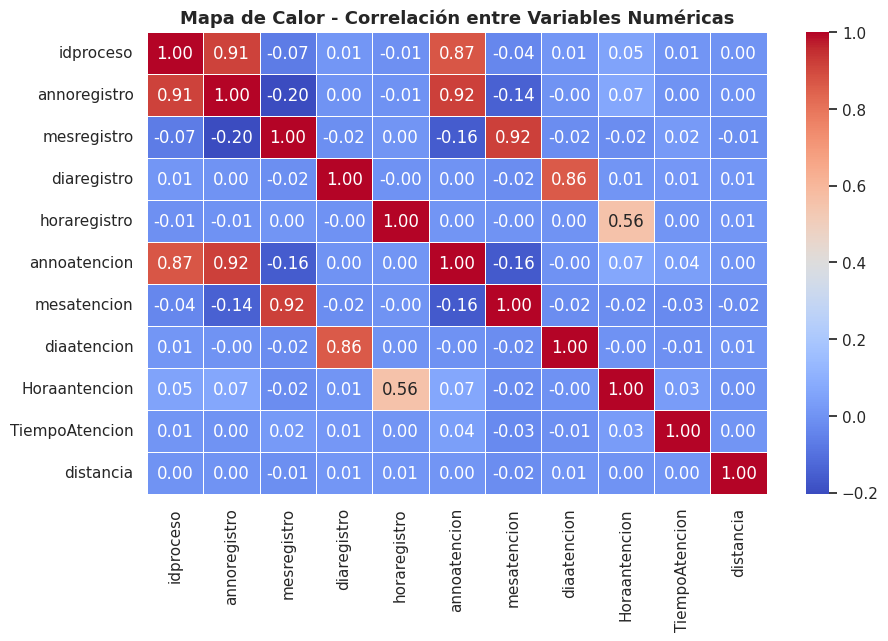

PARES DE VARIABLES ALTAMENTE CORRELACIONADAS (REDUNDANCIA DETECTADA):

,Variable_1,Variable_2,Correlación
2,annoatencion,annoregistro,0.919299
3,mesatencion,mesregistro,0.918199
0,annoregistro,idproceso,0.911987
1,annoatencion,idproceso,0.868641
4,diaatencion,diaregistro,0.859392


Columnas eliminadas por alta correlación: ['annoregistro', 'idproceso', 'diaregistro', 'mesregistro']

Dimensiones finales tras eliminación: (8967, 24)

In [ ]:
# =====================================================
# ANÁLISIS Y TRATAMIENTO AUTOMÁTICO DE CORRELACIÓN Y REDUNDANCIA
# =====================================================

def analizar_correlacion(df, umbral_corr=0.85, visualizar=True, eliminar=True):
    """
    Analiza la correlación entre variables numéricas y elimina redundancias.

    Parámetros:
    ------------
    df : pd.DataFrame
        Dataset de entrada (limpio o parcialmente procesado)
    umbral_corr : float
        Valor de correlación (absoluto) a partir del cual se considera redundancia.
    visualizar : bool
        Si True, muestra el mapa de calor de correlaciones.
    eliminar : bool
        Si True, elimina automáticamente variables redundantes.

    Retorna:
    --------
    df_correl : DataFrame limpio sin variables redundantes (si eliminar=True)
    correl_table : DataFrame con pares de variables altamente correlacionadas
    """

    # Copiar el DataFrame original
    df_correl = df.copy()

    # Seleccionar solo variables numéricas
    num_cols = df_correl.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) < 2:
        print(" No hay suficientes variables numéricas para analizar correlación.")
        return df_correl, pd.DataFrame()

    # Calcular matriz de correlación (Pearson)
    corr_matrix = df_correl[num_cols].corr(method='pearson')

    # Visualización del mapa de calor
    if visualizar:
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
        plt.title("Mapa de Calor - Correlación entre Variables Numéricas", fontsize=13, fontweight='bold')
        plt.show()

    # Detectar variables altamente correlacionadas
    correlaciones_altas = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > umbral_corr:
                correlaciones_altas.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    correl_table = pd.DataFrame(correlaciones_altas, columns=['Variable_1', 'Variable_2', 'Correlación'])
    correl_table = correl_table.sort_values(by='Correlación', ascending=False)

    # Mostrar resultados
    if correl_table.empty:
        print("\n No se encontraron correlaciones altas entre variables numéricas.")
        return df_correl, correl_table
    else:
        print("\n PARES DE VARIABLES ALTAMENTE CORRELACIONADAS (REDUNDANCIA DETECTADA):")
        display(correl_table)

    # Eliminar variables redundantes si se indica
    if eliminar:
        cols_eliminar_corr = list(set(correl_table['Variable_2']))
        df_correl.drop(columns=cols_eliminar_corr, inplace=True, errors='ignore')
        print(f"\n Columnas eliminadas por alta correlación: {cols_eliminar_corr}")
        print(f" Dimensiones finales tras eliminación: {df_correl.shape}")
    else:
        print("\n No se eliminaron columnas. Solo se detectaron correlaciones.")

    return df_correl, correl_table


# =====================================================
# 🔧 EJEMPLO DE USO
# =====================================================

# Aplicar análisis de correlación sobre el dataset limpio
df_final, correlaciones_detectadas = analizar_correlacion(
    df=df_limpio,
    umbral_corr=0.85,
    visualizar=True,
    eliminar=True
)


## **5.6. Transformación de variables  (Escalado- Normalización)**

In [ ]:
# =====================================================
# TRANSFORMACIÓN DE VARIABLES: ESCALADO Y NORMALIZACIÓN
# =====================================================

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import pandas as pd
import numpy as np

def transformar_variables(df, metodo='standard', visualizar=True):
    """
    Aplica transformación (escalado o normalización) a las variables numéricas del dataset.

    Parámetros:
    ------------
    df : pd.DataFrame
        Dataset de entrada (sin valores nulos)
    metodo : str
        Método de transformación: 'standard', 'minmax', 'robust', 'normalizer'
    visualizar : bool
        Si True, muestra estadísticas antes y después del escalado.

    Retorna:
    --------
    df_transformado : pd.DataFrame
        Dataset con variables numéricas transformadas.
    scaler : objeto del escalador (para aplicar sobre datos nuevos)
    """

    df_transformado = df.copy()

    # Seleccionar solo las columnas numéricas
    num_cols = df_transformado.select_dtypes(include=[np.number]).columns.tolist()
    if not num_cols:
        print(" No se encontraron variables numéricas para escalar o normalizar.")
        return df_transformado, None

    # Mostrar estadísticas iniciales
    if visualizar:
        print("\n Estadísticas ANTES de la transformación:")
        display(df_transformado[num_cols].describe().T)

    # Elegir el método de escalado
    if metodo == 'standard':
        scaler = StandardScaler()   # Media = 0, Desviación = 1
        metodo_nombre = "Estandarización (StandardScaler)"
    elif metodo == 'minmax':
        scaler = MinMaxScaler()     # Escala entre 0 y 1
        metodo_nombre = "Normalización Min-Max"
    elif metodo == 'robust':
        scaler = RobustScaler()     # Basado en la mediana, resistente a outliers
        metodo_nombre = "Escalado Robusto"
    elif metodo == 'normalizer':
        scaler = Normalizer()       # Normaliza por norma (para datos vectoriales)
        metodo_nombre = "Normalización por Norma"
    else:
        raise ValueError(" Método no válido. Usa: 'standard', 'minmax', 'robust' o 'normalizer'.")

    # Aplicar la transformación
    df_transformado[num_cols] = scaler.fit_transform(df_transformado[num_cols])

    # Mostrar estadísticas después del escalado
    if visualizar:
        print(f"\n Transformación aplicada: {metodo_nombre}")
        print("\n Estadísticas DESPUÉS de la transformación:")
        display(df_transformado[num_cols].describe().T)

    return df_transformado, scaler


# =====================================================
#  EJEMPLO DE USO
# =====================================================

# Escalado estándar (útil para modelos lineales y SVM)
df_scaled, scaler_standard = transformar_variables(df_final, metodo='standard')

# Si quisieras usar normalización Min-Max:
# df_scaled, scaler_minmax = transformar_variables(df_final, metodo='minmax')


Estadísticas ANTES de la transformación:

,count,mean,std,min,25%,50%,75%,max
horaregistro,8967.0,14.055425,4.707902,0.000000,11.000000,14.000000,18.00000,23.000000
annoatencion,8967.0,2020.018512,2.155636,2016.000000,2018.000000,2020.000000,2022.00000,2025.000000
mesatencion,8967.0,6.824244,3.335487,1.000000,4.000000,7.000000,10.00000,12.000000
diaatencion,8967.0,15.835954,8.393390,1.000000,9.000000,16.000000,23.00000,31.000000
Horaantencion,8967.0,14.626854,4.838381,0.000000,12.000000,15.000000,18.00000,23.000000
TiempoAtencion,8967.0,2671.377607,25840.000247,0.000000,14.000000,28.000000,132.50000,878976.000000
distancia,8967.0,8484.481152,304.845399,1759.926915,8482.191998,8483.506851,8486.79933,13230.957749


Transformación aplicada: Estandarización (StandardScaler)

Estadísticas DESPUÉS de la transformación:

,count,mean,std,min,25%,50%,75%,max
horaregistro,8967.0,1.454049e-16,1.000056,-2.985663,-0.649036,-0.011774,0.837909,1.900013
annoatencion,8967.0,3.485281e-14,1.000056,-1.864292,-0.936440,-0.008588,0.919264,2.311042
mesatencion,8967.0,1.299532e-16,1.000056,-1.746242,-0.846773,0.052696,0.952165,1.551811
diaatencion,8967.0,9.251239e-17,1.000056,-1.767674,-0.814490,0.019546,0.853582,1.806766
Horaantencion,8967.0,1.592719e-16,1.000056,-3.023257,-0.542950,0.077126,0.697203,1.730664
TiempoAtencion,8967.0,9.508769e-18,1.000056,-0.103387,-0.102845,-0.102304,-0.098259,33.914608
distancia,8967.0,2.074496e-15,1.000056,-22.060130,-0.007510,-0.003196,0.007605,15.570979


## **5.7. Codificación de variables categóricas**

Variable: diasemana (7 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: HoraPicoTarde (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: HoraPicoManana (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: InicioNoche (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: Amanecer (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: Municipio (5 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: Instancia (12 valores únicos)

Aplicado Target Encoding (alta cardinalidad)

Variable: clienteimportante (3 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: Acuerdo (10 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: UsuarioRegistra (7 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: LiberaVehiculo (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: ResultadoFallo (4 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: Aseguradora (8 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: RandomAbogado (8 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: Lluvia (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

RESUMEN DE MÉTODOS DE CODIFICACIÓN:

Variable  Valores Únicos Método Aplicado
        diasemana               7   OneHotEncoder
    HoraPicoTarde               2    LabelEncoder
   HoraPicoManana               2    LabelEncoder
      InicioNoche               2    LabelEncoder
         Amanecer               2    LabelEncoder
        Municipio               5   OneHotEncoder
        Instancia              12  TargetEncoding
clienteimportante               3   OneHotEncoder
          Acuerdo              10   OneHotEncoder
  UsuarioRegistra               7   OneHotEncoder
   LiberaVehiculo               2    LabelEncoder
   ResultadoFallo               4   OneHotEncoder
      Aseguradora               8   OneHotEncoder
    RandomAbogado               8   OneHotEncoder
           Lluvia               2    LabelEncoder

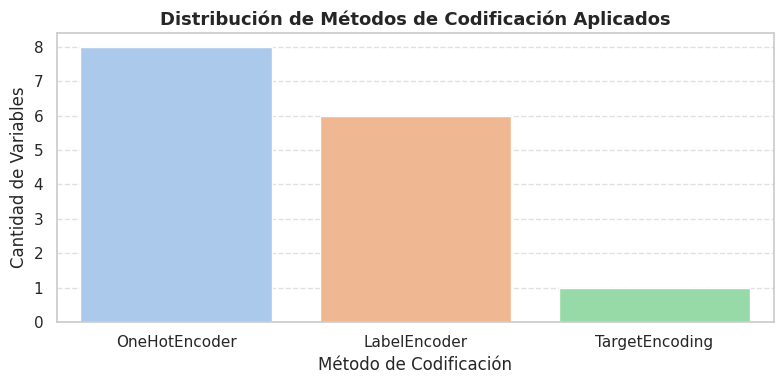

Codificadores guardados en 'codificadores_categoricos.pkl'

Codificación completada correctamente.

In [ ]:
# ============================================================
#  CODIFICACIÓN ADAPTATIVA DE VARIABLES CATEGÓRICAS
#  (Optimizada para predicción del tiempo de llegada)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

def codificar_variables_categoricas(df, variable_objetivo='TiempoAtencion', umbral_cardinalidad=10, guardar=False):
    """
    Codifica automáticamente todas las variables categóricas según su cardinalidad:
      - LabelEncoder → Variables binarias (2 categorías)
      - OneHotEncoder → Baja cardinalidad (≤ umbral_cardinalidad)
      - Target Encoding → Alta cardinalidad (> umbral_cardinalidad)

    Además:
      - Muestra tabla resumen con el método aplicado a cada variable
      - Genera visualización de distribución de métodos
      - Devuelve dataset codificado y mapeo de codificadores
    """

    df_codificado = df.copy()
    codificadores = {}
    resumen_codificacion = []

    cat_cols = df_codificado.select_dtypes(include=['object', 'category']).columns.tolist()

    if not cat_cols:
        print(" No se encontraron variables categóricas para codificar.")
        return df_codificado, codificadores, None

    for col in cat_cols:
        n_unicos = df_codificado[col].nunique()
        metodo = ""

        print(f"\nVariable: {col} ({n_unicos} valores únicos)")

        # ===== 1️ Label Encoding: variables binarias =====
        if n_unicos == 2:
            metodo = "LabelEncoder"
            le = LabelEncoder()
            df_codificado[col] = le.fit_transform(df_codificado[col].astype(str))
            codificadores[col] = ('LabelEncoder', le)
            print(f"Aplicado LabelEncoder (codificación binaria)")

        # ===== 2️ One-Hot Encoding: baja cardinalidad =====
        elif n_unicos <= umbral_cardinalidad:
            metodo = "OneHotEncoder"
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            ohe_array = ohe.fit_transform(df_codificado[[col]].astype(str))
            ohe_df = pd.DataFrame(ohe_array, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]])
            ohe_df.index = df_codificado.index
            df_codificado = pd.concat([df_codificado.drop(columns=[col]), ohe_df], axis=1)
            codificadores[col] = ('OneHotEncoder', ohe)
            print(f"Aplicado One-Hot Encoding (baja cardinalidad)")

        # ===== 3️ Target Encoding: alta cardinalidad =====
        else:
            metodo = "TargetEncoding"
            media_global = df_codificado[variable_objetivo].mean()
            encoding_map = df_codificado.groupby(col)[variable_objetivo].mean()
            df_codificado[col] = df_codificado[col].map(encoding_map).fillna(media_global)
            codificadores[col] = ('TargetEncoding', encoding_map.to_dict())
            print(f"Aplicado Target Encoding (alta cardinalidad)")

        resumen_codificacion.append({
            'Variable': col,
            'Valores Únicos': n_unicos,
            'Método Aplicado': metodo
        })

    # ===== Tabla resumen =====
    resumen_df = pd.DataFrame(resumen_codificacion)
    print("\n\n RESUMEN DE MÉTODOS DE CODIFICACIÓN:\n\n")
    print(resumen_df.to_string(index=False))

    # ===== Visualización =====
    plt.figure(figsize=(8, 4))
    sns.countplot(data=resumen_df, x='Método Aplicado', palette='pastel')
    plt.title("Distribución de Métodos de Codificación Aplicados", fontsize=13, fontweight='bold')
    plt.xlabel("Método de Codificación")
    plt.ylabel("Cantidad de Variables")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # ===== Guardar codificadores =====
    if guardar:
        joblib.dump(codificadores, "codificadores_categoricos.pkl")
        print("\n Codificadores guardados en 'codificadores_categoricos.pkl'")

    print("\n Codificación completada correctamente.")
    return df_codificado, codificadores, resumen_df


df_codificado, codificadores, resumen_cod = codificar_variables_categoricas(
    df,
    variable_objetivo='TiempoAtencion',  # o tu variable de predicción
    umbral_cardinalidad=10,
    guardar=True
)


### **6.7.1. Detección y Eliminación de Registros Duplicados**

In [ ]:
#Verificación y eliminación de registros duplicados

# Contar registros totales antes de eliminar
total_registros = len(df)

# Contar cuántos registros están duplicados
duplicados = df.duplicated().sum()

print("\n\n [bold]===== REVISIÓN DE DUPLICADOS =====[/bold]")
print(f"Total de registros: {total_registros}")
print(f"Registros duplicados encontrados: {duplicados}")

# Mostrar ejemplos de duplicados (si existen)
if duplicados > 0:
    print("\n Ejemplos de registros duplicados:")
    display(df[df.duplicated()].head())
else:
    print("\n\n  No se encontraron registros duplicados.")

# Eliminar duplicados y resetear el índice
df = df.drop_duplicates().reset_index(drop=True)

# 5. Confirmar resultado
print("\n\n [bold]RESULTADO FINAL[/bold]")
print(f"Registros después de eliminar duplicados: {len(df)}")
print(f"Duplicados restantes: {df.duplicated().sum()}")


===== REVISIÓN DE DUPLICADOS =====

Total de registros: 8040

Registros duplicados encontrados: 0

No se encontraron registros duplicados.

RESULTADO FINAL

Registros después de eliminar duplicados: 8040

Duplicados restantes: 0

### **6.7.2. Corrección Tipo de Datos**

In [ ]:
# ============================================================
# CORRECCIÓN DE TIPOS DE DATOS
# ============================================================

print("\n\n [bold]REVISIÓN DE TIPOS DE DATOS[/bold] \n")
print(df.dtypes)
print("\nTotal de columnas:", len(df.columns))

# ------------------------------------------------------------
# Convertir fechas a tipo datetime
# ------------------------------------------------------------
fecha_cols = [col for col in df.columns if 'fecha' in col.lower()]
for col in fecha_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    print(f"[bold] Columna '{col}' convertida a datetime. [/bold]")

# ------------------------------------------------------------
# Convertir columnas categóricas (tipo 'object') a 'category'
# ------------------------------------------------------------
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    df[col] = df[col].astype('category')
    print(f"[bold]  Columna '{col}' convertida a tipo 'category'.[/bold]")

# ------------------------------------------------------------
# Convertir columnas numéricas mal tipadas (ej. strings con números)
# ------------------------------------------------------------
num_like_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.replace('.', '', 1).str.isnumeric().any()]
for col in num_like_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"[bold] Columna '{col}' convertida a tipo numérico. [/bold] ")

# ------------------------------------------------------------
# Validar resultado final
# ------------------------------------------------------------
print("\n\n [bold]TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN[/bold] \n")
print(df.dtypes)


REVISIÓN DE TIPOS DE DATOS

annoregistro           int64
mesregistro            int64
diaregistro            int64
horaregistro           int64
diasemana             object
annoatencion         float64
mesatencion          float64
diaatencion          float64
Horaantencion        float64
TiempoAtencion       float64
HoraPicoTarde         object
HoraPicoManana        object
InicioNoche           object
Amanecer              object
Municipio             object
Instancia             object
clienteimportante     object
Acuerdo               object
UsuarioRegistra       object
LiberaVehiculo        object
ResultadoFallo        object
Aseguradora           object
RandomAbogado         object
Lluvia                object
distancia            float64
fecha_anio             int32
fecha_mes              int32
fecha_dia              int32
fecha_hora             int32
fechallegada_anio    float64
fechallegada_mes     float64
fechallegada_dia     float64
fechallegada_hora    float64
Abogadounico_freq    float64
dtype: object

Total de columnas: 34

 Columna 'fecha_anio' convertida a datetime. 

 Columna 'fecha_mes' convertida a datetime. 

 Columna 'fecha_dia' convertida a datetime. 

 Columna 'fecha_hora' convertida a datetime. 

 Columna 'fechallegada_anio' convertida a datetime. 

 Columna 'fechallegada_mes' convertida a datetime. 

 Columna 'fechallegada_dia' convertida a datetime. 

 Columna 'fechallegada_hora' convertida a datetime. 

  Columna 'diasemana' convertida a tipo 'category'.

  Columna 'HoraPicoTarde' convertida a tipo 'category'.

  Columna 'HoraPicoManana' convertida a tipo 'category'.

  Columna 'InicioNoche' convertida a tipo 'category'.

  Columna 'Amanecer' convertida a tipo 'category'.

  Columna 'Municipio' convertida a tipo 'category'.

  Columna 'Instancia' convertida a tipo 'category'.

  Columna 'clienteimportante' convertida a tipo 'category'.

  Columna 'Acuerdo' convertida a tipo 'category'.

  Columna 'UsuarioRegistra' convertida a tipo 'category'.

  Columna 'LiberaVehiculo' convertida a tipo 'category'.

  Columna 'ResultadoFallo' convertida a tipo 'category'.

  Columna 'Aseguradora' convertida a tipo 'category'.

  Columna 'RandomAbogado' convertida a tipo 'category'.

  Columna 'Lluvia' convertida a tipo 'category'.

TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN

annoregistro                  int64
mesregistro                   int64
diaregistro                   int64
horaregistro                  int64
diasemana                  category
annoatencion                float64
mesatencion                 float64
diaatencion                 float64
Horaantencion               float64
TiempoAtencion              float64
HoraPicoTarde              category
HoraPicoManana             category
InicioNoche                category
Amanecer                   category
Municipio                  category
Instancia                  category
clienteimportante          category
Acuerdo                    category
UsuarioRegistra            category
LiberaVehiculo             category
ResultadoFallo             category
Aseguradora                category
RandomAbogado              category
Lluvia                     category
distancia                   float64
fecha_anio           datetime64[ns]
fecha_mes            datetime64[ns]
fecha_dia            datetime64[ns]
fecha_hora           datetime64[ns]
fechallegada_anio    datetime64[ns]
fechallegada_mes     datetime64[ns]
fechallegada_dia     datetime64[ns]
fechallegada_hora    datetime64[ns]
Abogadounico_freq           float64
dtype: object

### **6.7.3. Eliminación de Categorías Pequeñas Variable Instancia**

In [ ]:
#Eliminación de categorias pequeñas para la variables categóricas relacionadas con la variable Instancia
df['Instancia'].value_counts().sort_values(ascending=False)



,count
Instancia,
SIMPLE,5870
PRELIMINAR LESIONES,1078
TELEFÓNICA,553
AUDIENCIA,278
PRELIMINAR DESISTIMIENTO,137
RECOBRO,69
PRELIMINAR HOMICIDIO,33
AUDIENCIA PREJUDICIAL,11
DEMANDA CIVIL,4


### **6.7.4. Reemplazo de Valores Para Agrupacion Por Categoría Instancia**

In [ ]:
#Reemplazo de valores para la agrupación de categorías

#Diccionario con los reemplazos a realizar
reemplazos = {  "PRELIMINAR DESISTIMIENTO": "OTROS"
              , "RECOBRO": "OTROS"
              , "PRELIMINAR HOMICIDIO": "OTROS"
              , "AUDIENCIA PREJUDICIAL": "OTROS"
              , "DEMANDA CIVIL": "OTROS"
              , "PRELIMINAR CONCURSO": "OTROS"
              , "PARTICULAR": "OTROS"
              , "PRELIMINAR DESISTIMIENTO pasa SIMPLE": "OTROS"}

#Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
df['Instancia'] = df['Instancia'].map(reemplazos).fillna(df['Instancia'])


#Visualización de las nuevos valores agrupados para la categoria 'Instancia'
df['Instancia'].value_counts().sort_values(ascending=False)

,count
Instancia,
SIMPLE,5870
PRELIMINAR LESIONES,1078
TELEFÓNICA,553
AUDIENCIA,278
OTROS,261


### **6.7.5. Eliminación de Categorias Municipios**

Procedemos a eliminar todos los municipios debido a que nuestro análisis lo vamos a enfocar en la ciudad de Medellín y alrededores.

In [ ]:
# conteo de los municipios
conteo_municipios = df['Municipio'].value_counts()
# Seleccionar los municipios más comunes
top_municipios = conteo_municipios.nlargest(6).index
print(f"\nLos municipios más frecuentes: {list(top_municipios)}")

Los municipios más frecuentes: ['Medellín', 'Envigado', 'Itagüí', 'Bello', 'La Estrella']

In [ ]:
#Eliminación de categorias pequeñas para la variables categoricas - Municipios
df['Municipio'].value_counts().sort_values(ascending=False).head(20)

,count
Municipio,
Medellín,6088
Envigado,739
Itagüí,569
Bello,496
La Estrella,148


### **6.7.6. Eliminación de Categorias Aseguradora**

In [ ]:
# conteo de las Aseguradoras
conteo_aseguradora = df['Aseguradora'].value_counts()
# Seleccionar las Aseguradoras más comunes
top_aseguradora = conteo_aseguradora.nlargest(2).index

# Add the new category 'Otras Aseguradora' to the categorical column
if 'Otras Aseguradora' not in df['Aseguradora'].cat.categories:
    df['Aseguradora'] = df['Aseguradora'].cat.add_categories('Otras Aseguradora')

df['Aseguradora'] = df['Aseguradora'].where(
    df['Aseguradora'].isin(top_aseguradora),
    other='Otras Aseguradora'
)

df['Aseguradora'].value_counts().sort_values(ascending=False).head(20)

,count
Aseguradora,
Liberty Seguros SA,6417
IKE ASIST,1524
Otras Aseguradora,99
ALC SAS - Penales,0
Andi Asistencia SA,0
HDI SEGUR,0
Asegurado,0
Ariza y Gomez - Re,0
MUNDIAL D,0


### **6.7.7. Eliminación de Categorias Acuerdo**

In [ ]:
# conteo de los Acuerdos
conteo_Acuerdo = df['Acuerdo'].value_counts()
# Seleccionar los Acuerdos más comunes
top_Acuerdo = conteo_Acuerdo.nlargest(2).index

# Add the new category 'Otros Acuerdo' to the categorical column
if 'Otros Acuerdo' not in df['Acuerdo'].cat.categories:
    df['Acuerdo'] = df['Acuerdo'].cat.add_categories('Otros Acuerdo')

df['Acuerdo'] = df['Acuerdo'].where(
    df['Acuerdo'].isin(top_Acuerdo),
    other='Otros Acuerdo'
)

df['Acuerdo'].value_counts().sort_values(ascending=False).head(20)

,count
Acuerdo,
Otros Acuerdo,4623
Tránsito,2846
Acuerdo entre las partes,571
Cancelado,0
Cada uno asume su daño,0
Carta Entregada,0
Carta Recibida,0
Fuga sin tránsito,0
Fuga con tránsito,0


### **6.7.8. Escalado robusto (RobustScaler) Variables Numéricas**

 Columnas numéricas a escalar: 

Index(['annoregistro', 'mesregistro', 'diaregistro', 'horaregistro',
       'annoatencion', 'mesatencion', 'diaatencion', 'Horaantencion',
       'TiempoAtencion', 'distancia', 'fechallegada_anio', 'fechallegada_mes',
       'fechallegada_dia', 'fechallegada_hora', 'Abogadounico_freq',
       'TiempoAtencion_wins', 'TiempoAtencion_log', 'TiempoAtencion_scaled'],
      dtype='object')

Escalado robusto aplicado correctamente a las variables numéricas.

Las variables se escalaron reduciendo el impacto de outliers.

===== COMPARACIÓN ESTADÍSTICAS DE ESCALADO (Antes vs Después) =====

,Media (Antes),Desv.Std (Antes),Mín (Antes),Máx (Antes),Media (Después),Desv.Std (Después),Mín (Después),Máx (Después)
annoregistro,2019.604,2.221,2016.000,2025.000,-0.132,0.740,-1.333,1.667
mesregistro,6.821,3.536,1.000,12.000,-0.030,0.589,-1.000,0.833
diaregistro,15.834,8.849,1.000,31.000,-0.011,0.590,-1.000,1.000
horaregistro,14.106,4.598,0.000,23.000,0.015,0.657,-2.000,1.286
annoatencion,2019.604,2.221,2016.000,2025.000,-0.132,0.740,-1.333,1.667
mesatencion,6.821,3.536,1.000,12.000,-0.030,0.589,-1.000,0.833
diaatencion,15.838,8.849,1.000,31.000,-0.011,0.590,-1.000,1.000
Horaantencion,14.556,4.957,0.000,23.000,-0.063,0.708,-2.143,1.143
TiempoAtencion,52.025,93.327,0.000,545.000,0.912,2.745,-0.618,15.412
distancia,8483.480,284.994,1759.927,13230.588,-0.006,63.069,-1487.923,1050.525


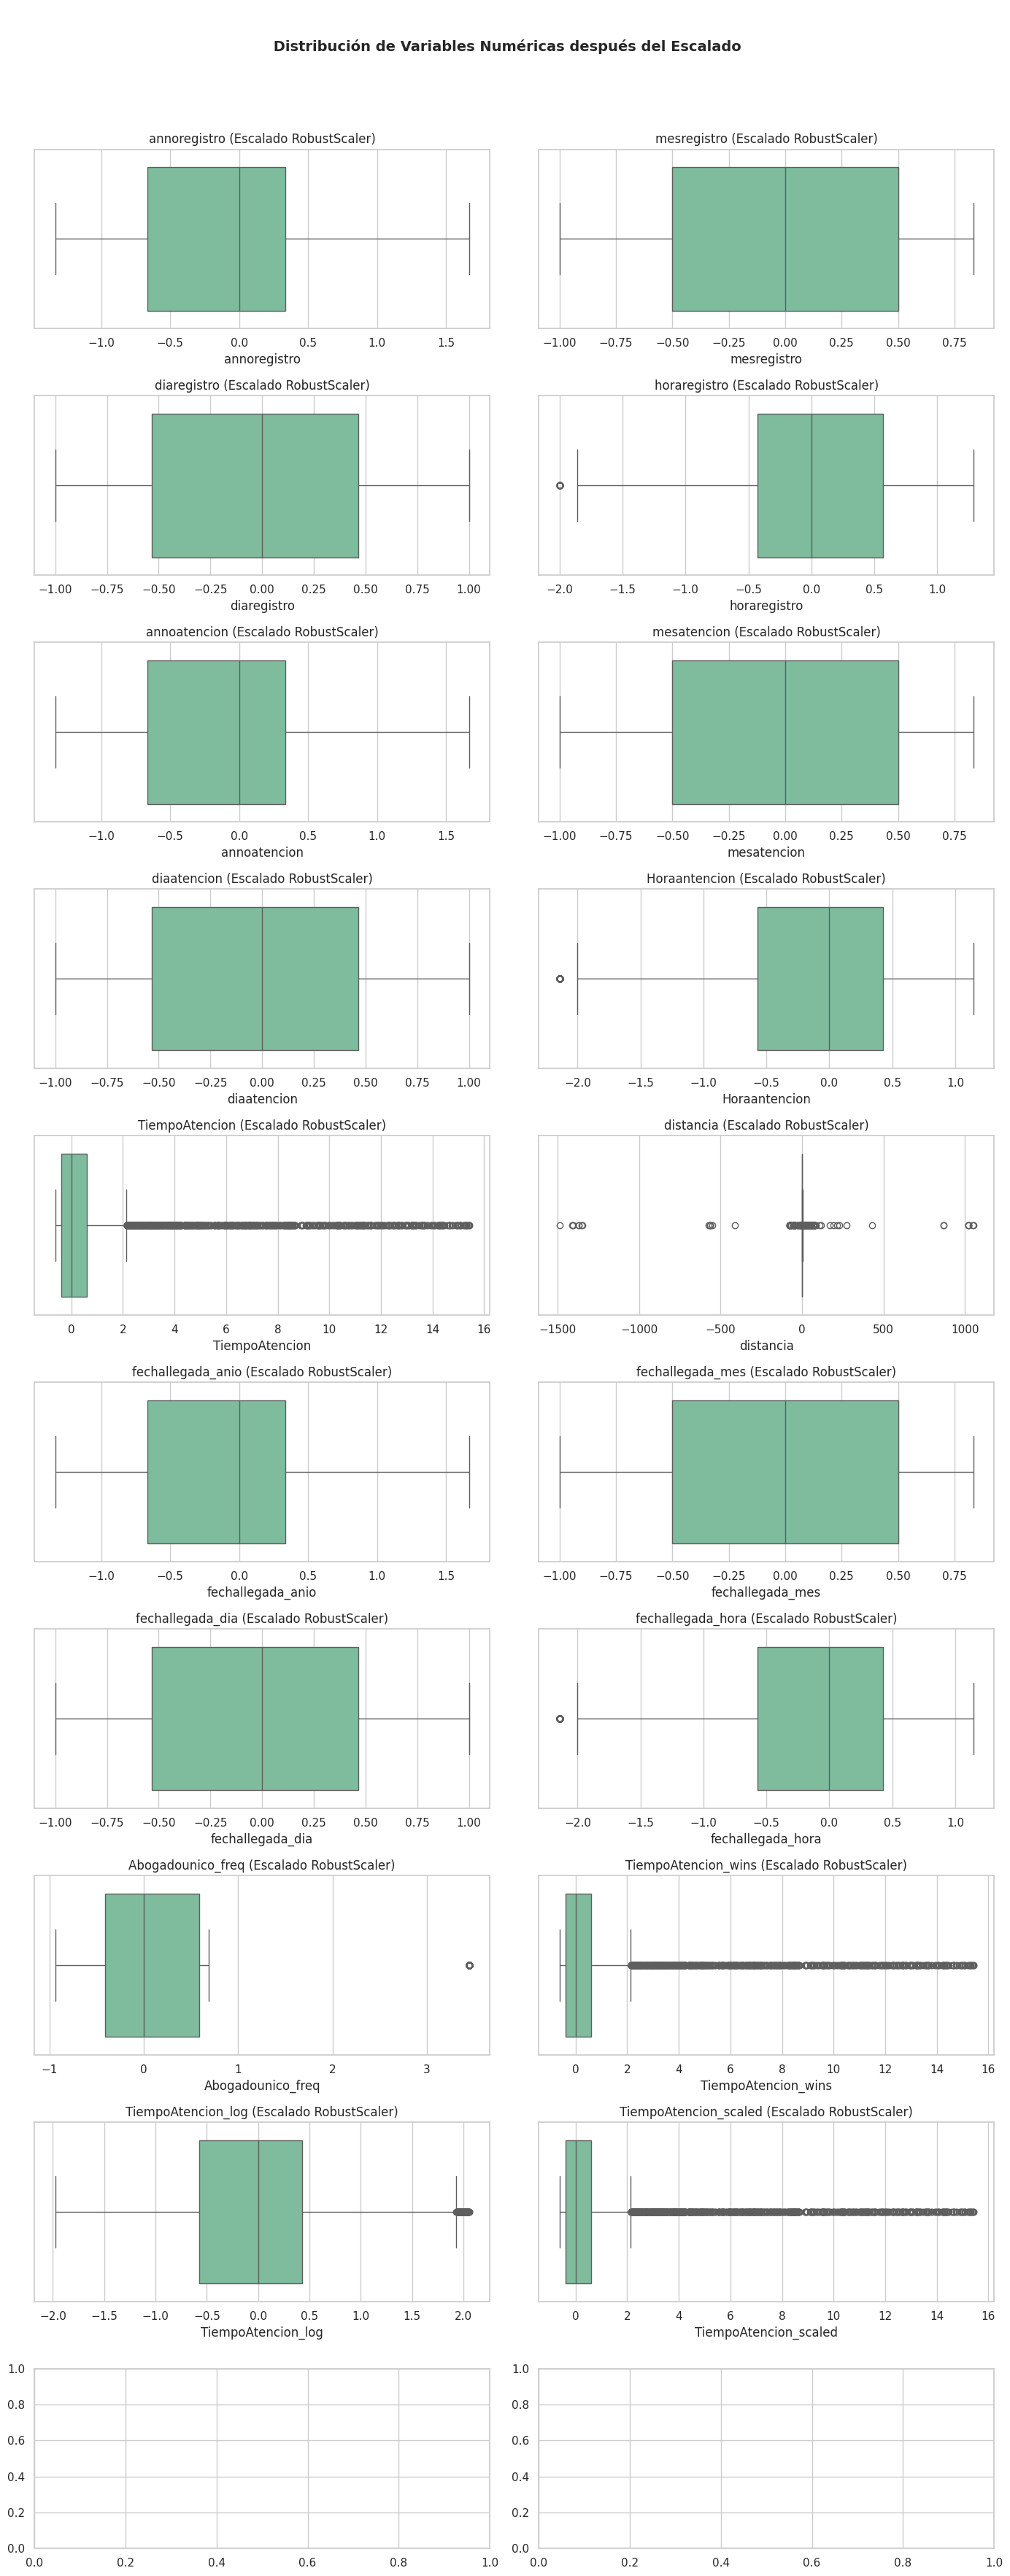

In [ ]:
# ============================================================
# ESCALADO DE VARIABLES NUMÉRICAS CON ROBUSTSCALER
# ============================================================

from sklearn.preprocessing import RobustScaler

# --- 1.Identificar columnas numéricas ---
numeric_cols = df_filtrado.select_dtypes(include=['int64', 'float64']).columns
print("\n\n [bold] Columnas numéricas a escalar: [/bold]")
display(numeric_cols)

# --- 2️.Aplicar RobustScaler ---
scaler = RobustScaler()
df_scaled = df_filtrado.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_filtrado[numeric_cols])

print("\n\n Escalado robusto aplicado correctamente a las variables numéricas.")
print("\n\n Las variables se escalaron reduciendo el impacto de outliers.\n")

# --- 3️.Verificación estadística antes y después ---
before = df_filtrado[numeric_cols].describe().T
after = pd.DataFrame(df_scaled[numeric_cols]).describe().T

comparacion = pd.concat([before[['mean', 'std', 'min', 'max']],
                         after[['mean', 'std', 'min', 'max']]],
                        axis=1)
comparacion.columns = ['Media (Antes)', 'Desv.Std (Antes)', 'Mín (Antes)', 'Máx (Antes)',
                       'Media (Después)', 'Desv.Std (Después)', 'Mín (Después)', 'Máx (Después)']

print("\n\n [bold]===== COMPARACIÓN ESTADÍSTICAS DE ESCALADO (Antes vs Después) =====[/bold]\n")
display(comparacion.round(3))

# --- 4️.Boxplots de verificación ---
fig, axes = plt.subplots(nrows=int(len(numeric_cols)/2) + 1, ncols=2, figsize=(14, 4 * (len(numeric_cols)//2)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_scaled[col], color="#74C69D", ax=axes[i])
    axes[i].set_title(f"{col} (Escalado RobustScaler)")
    axes[i].set_xlabel(col)

plt.suptitle("\n\n Distribución de Variables Numéricas después del Escalado", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **6.7.9. Codificación de Variables Categóricas (One-Hot / Label Encoding)**

In [ ]:
# ============================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# ============================================================

from sklearn.preprocessing import LabelEncoder

# --- 1️ Identificar columnas categóricas ---
cat_cols = df_scaled.select_dtypes(include=['object', 'category']).columns
print("\n\n Columnas categóricas detectadas:")
display(cat_cols)

# --- 2️ Analizar cardinalidad (número de categorías únicas) ---
cardinalidad = df_scaled[cat_cols].nunique().sort_values(ascending=False)
print("\n\n [bold]CARDINALIDAD DE VARIABLES CATEGÓRICAS[/bold]")
display(cardinalidad)

# --- 3️ Decidir tipo de codificación ---
# One-Hot Encoding -> variables con baja cardinalidad (<= 10 categorías)
# Label Encoding -> variables con alta cardinalidad (> 10 categorías)

onehot_cols = [col for col in cat_cols if df_scaled[col].nunique() <= 10]
label_cols = [col for col in cat_cols if df_scaled[col].nunique() > 10]

print(f"\n\n Columnas para One-Hot Encoding ({len(onehot_cols)}):")
print(onehot_cols)
print(f"\n\n Columnas para Label Encoding ({len(label_cols)}):")
print(label_cols)

# --- 4️ Aplicar One-Hot Encoding ---
if onehot_cols:
    df_encoded = pd.get_dummies(df_scaled, columns=onehot_cols, drop_first=True)
else:
    df_encoded = df_scaled.copy()

# --- 5️ Aplicar Label Encoding ---
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    print(f"\n\n Label Encoding aplicado a '{col}'.")

# --- 6️ Verificación final ---
print("\n\n [bold]DIMENSIONES DESPUÉS DE LA CODIFICACIÓN[/bold]")
print(f"Filas: {df_encoded.shape[0]}  |  Columnas: {df_encoded.shape[1]}")

print("\n\n Ejemplo de variables codificadas:")
display(df_encoded.head())

# --- 7️ Confirmar tipos de datos ---
print("\n\n [bold]TIPOS DE DATOS FINALES[/bold]")
print(df_encoded.dtypes.value_counts())


Columnas categóricas detectadas:

Index(['diasemana', 'HoraPicoTarde', 'HoraPicoManana', 'InicioNoche',
       'Amanecer', 'Municipio', 'Instancia', 'clienteimportante', 'Acuerdo',
       'UsuarioRegistra', 'LiberaVehiculo', 'ResultadoFallo', 'Aseguradora',
       'RandomAbogado', 'Lluvia'],
      dtype='object')

CARDINALIDAD DE VARIABLES CATEGÓRICAS

,0
Instancia,11
Acuerdo,10
Aseguradora,8
RandomAbogado,8
UsuarioRegistra,7
diasemana,7
Municipio,5
ResultadoFallo,4
clienteimportante,3
HoraPicoTarde,2


Columnas para One-Hot Encoding (14):

[
    'diasemana',
    'HoraPicoTarde',
    'HoraPicoManana',
    'InicioNoche',
    'Amanecer',
    'Municipio',
    'clienteimportante',
    'Acuerdo',
    'UsuarioRegistra',
    'LiberaVehiculo',
    'ResultadoFallo',
    'Aseguradora',
    'RandomAbogado',
    'Lluvia'
]

Columnas para Label Encoding (1):

['Instancia']

Label Encoding aplicado a 'Instancia'.

DIMENSIONES DESPUÉS DE LA CODIFICACIÓN

Filas: 6450  |  Columnas: 73

Ejemplo de variables codificadas:

,annoregistro,mesregistro,diaregistro,horaregistro,annoatencion,mesatencion,diaatencion,Horaantencion,TiempoAtencion,Instancia,...,Aseguradora_Liberty Seguros SA,Aseguradora_MUNDIAL D,RandomAbogado_ELSA ROSA VEGA LOPEZ,RandomAbogado_Elkin Lezcano,RandomAbogado_JOHAN ALEXANDER MESA RIVERA,RandomAbogado_John Jairo Tabares Chavarriaga,RandomAbogado_Juan Felipe Hoyos Botero,RandomAbogado_Luis Fernando Saldarriaga Rodriguez,RandomAbogado_SEBASTIAN LOPEZ GOMEZ,Lluvia_Si
0,-1.333333,-0.166667,-0.533333,-0.714286,-1.333333,-0.166667,-0.533333,-0.857143,-0.617647,7,...,True,False,True,False,False,False,False,False,False,False
1,-1.333333,-0.166667,-0.533333,-0.428571,-1.333333,-0.166667,-0.533333,-0.571429,-0.617647,7,...,False,False,False,False,False,False,True,False,False,False
2,-1.333333,-0.166667,-0.533333,0.000000,-1.333333,-0.166667,-0.533333,-0.142857,-0.617647,9,...,False,False,True,False,False,False,False,False,False,False
3,-1.333333,-0.166667,-0.533333,0.571429,-1.333333,-0.166667,-0.533333,0.428571,-0.617647,9,...,False,False,False,False,False,False,False,False,False,False
4,-1.333333,-0.166667,-0.533333,0.714286,-1.333333,-0.166667,-0.533333,0.571429,-0.617647,9,...,False,False,False,False,False,False,False,False,True,False


TIPOS DE DATOS FINALES

bool       50
float64    18
int32       4
int64       1
Name: count, dtype: int64

### **6.7.10. Mostrar cuántos valores extremos hay (mayores a 1 hora = 3600 segundos)**

In [ ]:
# Mostrar cuántos valores extremos hay (mayores a 1 hora = 3600 segundos)
outliers = df[df["TiempoAtencion"] > 3600]
print(f"[bold]Registros con TiempoAtencion > 1 hora: {len(outliers)} de {len(df)} totales [/bold]")

#obtener el promedio de atención sin tener encuenta los outliers para mejor asignación
promedioatencion = df[~df.index.isin(outliers.index)]['TiempoAtencion'].mean()
promedioatencion

Registros con TiempoAtencion > 1 hora: 572 de 8040 totales 

np.float64(262.52570969469735)

### **6.7.11. Cálculo Promedio Tiempo Atención**

Generar valores aleatorios sólo para los registros outliers de la variable TiempoAtencion

In [ ]:
# Generar valores aleatorios sólo para los registros outliers
# Obtener los índices de los outliers
indices_outliers = df.index.isin(outliers.index)

# Contar cuántos outliers hay
num_outliers = indices_outliers.sum()

# Asignar valores aleatorios SOLO a los outliers usando loc
df.loc[indices_outliers, 'TiempoAtencion'] = np.random.randint(1, promedioatencion, size=num_outliers)

# Calcular el nuevo promedio
nuevo_promedio = df['TiempoAtencion'].mean()
print(f"[bold] Nuevo promedio de TiempoAtencion: {nuevo_promedio:.2f} [/bold]")

 Nuevo promedio de TiempoAtencion: 253.32 

## **5.8. Cálculo Promedio Atención**

In [ ]:
# Ensure dias_espanol dictionary is defined
dias_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miercoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sabado',
    'Sunday': 'Domingo'
}

# Calculate max time attention (handle potential NaNs)
maximo = df['TiempoAtencion'].max()
if pd.isna(maximo):
    # If max is NaN (e.g., all TiempoAtencion are NaN), use a default or calculate from non-nulls
    print("Warning: Max TiempoAtencion is NaN. Using median for imputation range.")
    median_tiempo = df['TiempoAtencion'].median()
    maximo = median_tiempo if pd.notna(median_tiempo) else 60 # Use median or a default like 60 minutes


df_nulos = df[df['TiempoAtencion'].isna()]
# Obtener los índices de los null
indices_null = df.index.isin(df_nulos.index)
# Contar cuántos valores nulos hay
total_nulos = indices_null.sum()

if total_nulos > 0:
    # Asignar valores aleatorios solo a los valores null de la fecha tiempo de atención
    # Ensure the upper bound for randint is valid (>= lower bound)
    upper_bound = max(1, int(maximo)) # Ensure upper bound is at least 1
    df.loc[indices_null, 'TiempoAtencion'] = np.random.randint(1, upper_bound + 1, size=total_nulos) # Use 1 to upper_bound inclusive

    #actualizar la fecha de llegada teniendo encuenta el valor calculado aleatoriamente de tiempo de atención
    # Ensure 'fecha' column is datetime type before adding timedelta
    df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
    df.loc[indices_null, 'fechallegada'] = df.loc[indices_null, 'fecha'] + pd.to_timedelta(df.loc[indices_null, 'TiempoAtencion'], unit='minutes')

    # Update date and time components from the new fechallegada
    df.loc[indices_null, 'annoatencion'] = df.loc[indices_null, 'fechallegada'].dt.year
    df.loc[indices_null, 'mesatencion'] = df.loc[indices_null, 'fechallegada'].dt.month
    df.loc[indices_null, 'diaatencion'] = df.loc[indices_null, 'fechallegada'].dt.day
    df.loc[indices_null, 'Horaantencion'] = df.loc[indices_null, 'fechallegada'].dt.hour

    # Add all possible Spanish day names to the 'diasemana' categories before assigning
    spanish_day_names = list(dias_espanol.values())
    # Convert 'diasemana' to category if it's not already
    if not pd.api.types.is_categorical_dtype(df['diasemana']):
         df['diasemana'] = df['diasemana'].astype('category')

    # Add categories if they are not already present
    new_categories_to_add = [day for day in spanish_day_names if day not in df['diasemana'].cat.categories]
    if new_categories_to_add:
        df['diasemana'] = df['diasemana'].cat.add_categories(new_categories_to_add)

    # Map and assign the Spanish day names
    df.loc[indices_null, 'diasemana'] = df.loc[indices_null, 'fechallegada'].dt.day_name().map(dias_espanol)

    print(f"✅ Se imputaron {total_nulos} valores nulos en TiempoAtencion y se actualizaron fechas/horas relacionadas.")

else:
    print("ℹ️ No se encontraron valores nulos en TiempoAtencion para imputar.")


# Calcular el nuevo promedio
nuevo_promedio = df['TiempoAtencion'].mean()
print(f"[bold] Nuevo promedio de TiempoAtencion: {nuevo_promedio:.2f} [/bold]")

#df.loc[indices_null, ['Horaantencion', 'diasemana', 'diaatencion', 'mesatencion', 'annoatencion', 'fecha','TiempoAtencion' ,'fechallegada']]

ℹ️ No se encontraron valores nulos en TiempoAtencion para imputar.

 Nuevo promedio de TiempoAtencion: 253.32 

## **5.9. Creación de Nuevas Variables (Feature Engineering)**

El siguiente paso lógico tras la limpieza, imputación y escalado es la creación de nuevas variables (feature engineering), que mejora el poder predictivo del modelo y permite capturar mejor las relaciones entre los datos.

### **5.9.1. Creación de Nuevas Variables Feature Engineering**



Iniciando creación de nuevas variables...

Generando visualizaciones de nuevas variables...

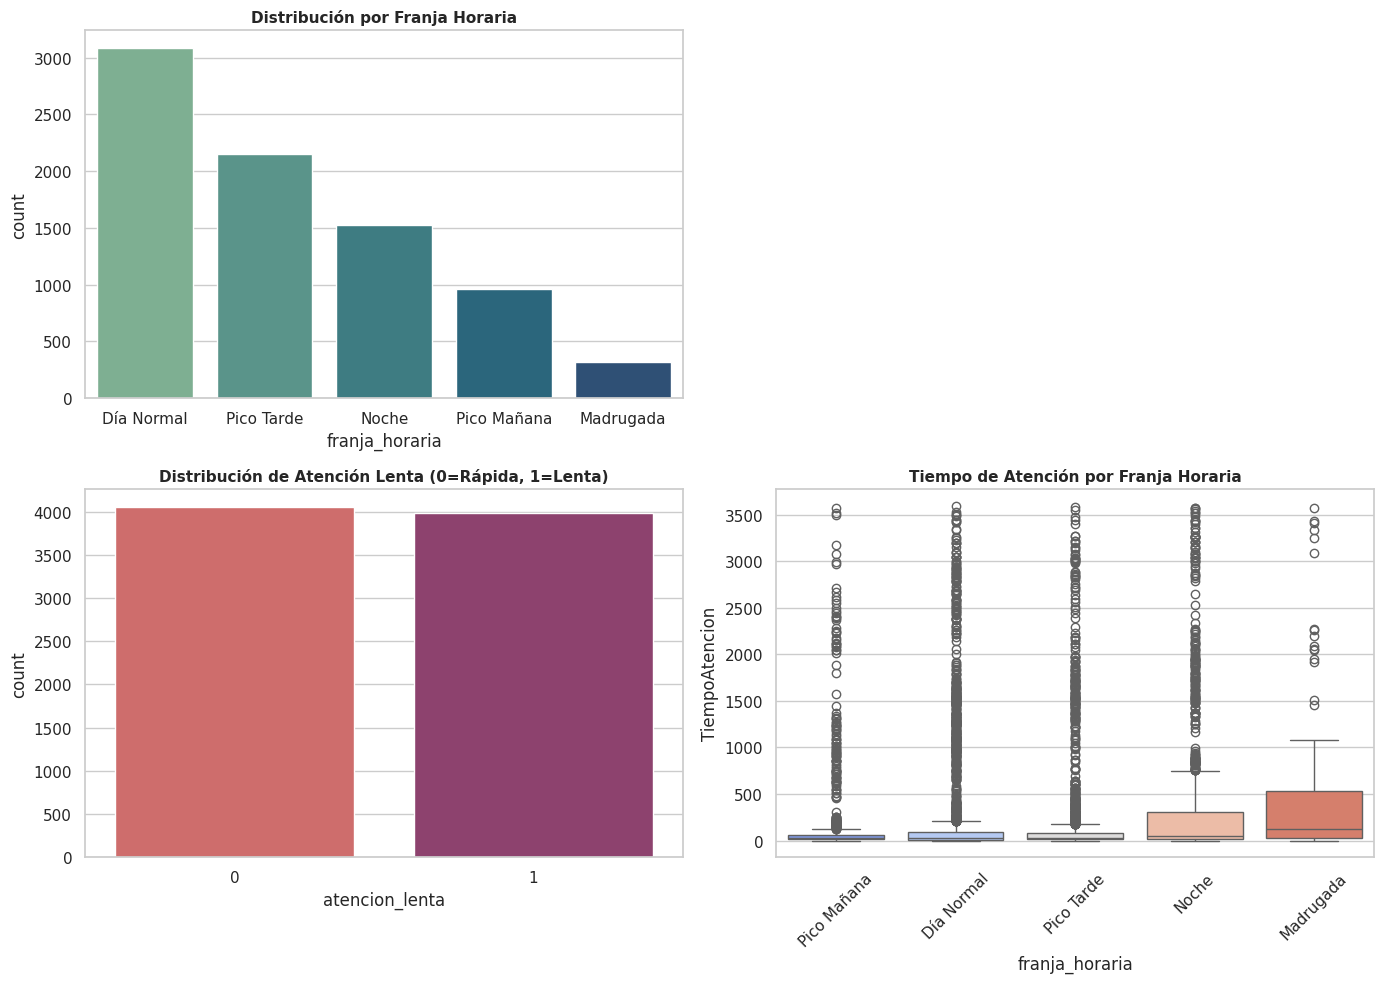

Se han creado 6 nuevas variables:

→ franja_horaria

→ hora_sin

→ hora_cos

→ atencion_lenta

→ condicion_lluvia

→ Municipio_top

Feature Engineering completado exitosamente.

,annoregistro,mesregistro,diaregistro,horaregistro,diasemana,annoatencion,mesatencion,diaatencion,Horaantencion,TiempoAtencion,...,fechallegada_mes,fechallegada_dia,fechallegada_hora,Abogadounico_freq,franja_horaria,hora_sin,hora_cos,atencion_lenta,condicion_lluvia,Municipio_top
0,2016,6,8,9,Miercoles,2016.0,6.0,8.0,9.0,0.0,...,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,0.03972,Pico Mañana,0.707107,-7.071068e-01,0,No,Medellín
1,2016,6,8,11,Miercoles,2016.0,6.0,8.0,11.0,0.0,...,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000011,0.03972,Día Normal,0.258819,-9.659258e-01,0,No,Medellín
2,2016,6,8,14,Miercoles,2016.0,6.0,8.0,14.0,0.0,...,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000014,0.03972,Día Normal,-0.500000,-8.660254e-01,0,No,Medellín
3,2016,6,8,18,Miercoles,2016.0,6.0,8.0,18.0,0.0,...,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000018,0.03972,Pico Tarde,-1.000000,-1.836970e-16,0,No,Medellín
4,2016,6,8,19,Miercoles,2016.0,6.0,8.0,19.0,0.0,...,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000019,0.03972,Pico Tarde,-0.965926,2.588190e-01,0,No,Medellín


In [ ]:
# =========================================================
# CREACIÓN DE NUEVAS VARIABLES (Feature Engineering)
# =========================================================

def crear_variables_feature_engineering(df):
    """
    Crea nuevas variables derivadas del dataset para análisis y modelado predictivo.
    Incluye variables temporales, cíclicas, contextuales y de comportamiento.
    """

    df_feat = df.copy()
    print(" Iniciando creación de nuevas variables...\n")

    # ---------------------------------------------------------
    # Conversión de fechas (validación robusta)
    # ---------------------------------------------------------
    for col in ['fecha', 'fechallegada']:
        if col in df_feat.columns:
            df_feat[col] = pd.to_datetime(df_feat[col], errors='coerce')

    # ---------------------------------------------------------
    # Variables derivadas de la fecha de registro
    # ---------------------------------------------------------
    if 'fecha' in df_feat.columns:
        df_feat['anio_registro'] = df_feat['fecha'].dt.year
        df_feat['mes_registro'] = df_feat['fecha'].dt.month
        df_feat['dia_registro'] = df_feat['fecha'].dt.day
        df_feat['dia_semana_registro'] = df_feat['fecha'].dt.day_name()
        df_feat['es_fin_semana_registro'] = df_feat['dia_semana_registro'].isin(['Saturday', 'Sunday']).astype(int)
        df_feat['es_dia_pico_registro'] = df_feat['dia_semana_registro'].isin(['Monday', 'Friday']).astype(int)

    # ---------------------------------------------------------
    # Variables derivadas de la fecha de atención
    # ---------------------------------------------------------
    if 'fechallegada' in df_feat.columns:
        df_feat['anio_atencion'] = df_feat['fechallegada'].dt.year
        df_feat['mes_atencion'] = df_feat['fechallegada'].dt.month
        df_feat['dia_atencion'] = df_feat['fechallegada'].dt.day
        df_feat['dia_semana_atencion'] = df_feat['fechallegada'].dt.day_name()
        df_feat['es_fin_semana_atencion'] = df_feat['dia_semana_atencion'].isin(['Saturday', 'Sunday']).astype(int)
        df_feat['es_dia_pico_atencion'] = df_feat['dia_semana_atencion'].isin(['Monday', 'Friday']).astype(int)

    # ---------------------------------------------------------
    # Diferencia de tiempo entre registro y atención
    # ---------------------------------------------------------
    if {'fecha', 'fechallegada'}.issubset(df_feat.columns):
        df_feat['dias_diferencia_reg_atencion'] = (
            (df_feat['fechallegada'] - df_feat['fecha']).dt.total_seconds() / (3600 * 24)
        ).round(2)

    # ---------------------------------------------------------
    # Franja horaria (según hora de atención)
    # ---------------------------------------------------------
    if 'Horaantencion' in df_feat.columns:
        def franja_horaria(hora):
            if pd.isna(hora): return np.nan
            if 0 <= hora < 6: return 'Madrugada'
            elif 6 <= hora < 10: return 'Pico Mañana'
            elif 10 <= hora < 16: return 'Día Normal'
            elif 16 <= hora < 20: return 'Pico Tarde'
            else: return 'Noche'

        df_feat['franja_horaria'] = df_feat['Horaantencion'].apply(franja_horaria)

        # Variables cíclicas
        df_feat['hora_sin'] = np.sin(2 * np.pi * df_feat['Horaantencion'] / 24)
        df_feat['hora_cos'] = np.cos(2 * np.pi * df_feat['Horaantencion'] / 24)

    # ---------------------------------------------------------
    # Indicador de atención lenta
    # ---------------------------------------------------------
    if 'TiempoAtencion' in df_feat.columns:
        mediana_tiempo = df_feat['TiempoAtencion'].median()
        df_feat['atencion_lenta'] = (df_feat['TiempoAtencion'] > mediana_tiempo).astype(int)

    # ---------------------------------------------------------
    # Condición de lluvia simplificada
    # ---------------------------------------------------------
    if 'Lluvia' in df_feat.columns:
        df_feat['Lluvia'] = df_feat['Lluvia'].astype(str).str.strip().str.lower()
        df_feat['condicion_lluvia'] = df_feat['Lluvia'].apply(
            lambda x: 'Sí' if x in ['si', 'sí', '1', 'true', 't'] else 'No'
        )

    # ---------------------------------------------------------
    # Municipios agrupados por frecuencia
    # ---------------------------------------------------------
    if 'Municipio' in df_feat.columns:
        df_feat['Municipio'] = df_feat['Municipio'].astype(str).str.strip().str.title()
        top_muns = df_feat['Municipio'].value_counts().nlargest(10).index
        df_feat['Municipio_top'] = df_feat['Municipio'].apply(lambda x: x if x in top_muns else 'Otros')

    # ---------------------------------------------------------
    # Visualizaciones automáticas
    # ---------------------------------------------------------
    print("\n Generando visualizaciones de nuevas variables...\n")
    plt.figure(figsize=(14, 10))

    # 1️ Franja horaria
    if 'franja_horaria' in df_feat.columns:
        plt.subplot(2, 2, 1)
        sns.countplot(data=df_feat, x='franja_horaria', order=df_feat['franja_horaria'].value_counts().index, palette='crest')
        plt.title('Distribución por Franja Horaria', fontsize=11, fontweight='bold')

    # 2️ Día de la semana (atención)
    if 'dia_semana_atencion' in df_feat.columns:
        plt.subplot(2, 2, 2)
        order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
        sns.countplot(data=df_feat, x='dia_semana_atencion', order=order, palette='mako')
        plt.title('Distribución por Día de Atención', fontsize=11, fontweight='bold')
        plt.xticks(rotation=45)

    # 3️ Atención lenta
    if 'atencion_lenta' in df_feat.columns:
        plt.subplot(2, 2, 3)
        sns.countplot(data=df_feat, x='atencion_lenta', palette='flare')
        plt.title('Distribución de Atención Lenta (0=Rápida, 1=Lenta)', fontsize=11, fontweight='bold')

    # 4️ Boxplot TiempoAtencion vs Franja Horaria
    if {'TiempoAtencion', 'franja_horaria'}.issubset(df_feat.columns):
        plt.subplot(2, 2, 4)
        sns.boxplot(data=df_feat, x='franja_horaria', y='TiempoAtencion', palette='coolwarm')
        plt.title('Tiempo de Atención por Franja Horaria', fontsize=11, fontweight='bold')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # Resumen final
    # ---------------------------------------------------------
    nuevas_cols = [c for c in df_feat.columns if c not in df.columns]
    print(f"\n Se han creado {len(nuevas_cols)} nuevas variables:\n")
    for col in nuevas_cols:
        print(f"   → {col}")

    print("\nFeature Engineering completado exitosamente.")
    return df_feat


# =========================================================
# LLAMADO DIRECTO
# =========================================================
df_feat_engineered = crear_variables_feature_engineering(df)
display(df_feat_engineered.head())


### **5.9.2. Nueva Variable Indicador Binario Fin de semana**

El tiempo de atención varía drásticamente entre la semana laboral y el fin de semana. Es más útil un indicador binario que el nombre del día (diasemana) en sí.

In [ ]:
# Crear una nueva columna binaria (0 o 1)
df['fin_de_semana'] = df['diasemana'].apply(
    lambda x: 1 if x in ['Sábado', 'Domingo'] else 0
)

In [ ]:
# Ver estructura básica
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head(3))

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

Dimensiones del dataset:
(8040, 35)

Primeras filas:

,annoregistro,mesregistro,diaregistro,horaregistro,diasemana,annoatencion,mesatencion,diaatencion,Horaantencion,TiempoAtencion,...,fecha_anio,fecha_mes,fecha_dia,fecha_hora,fechallegada_anio,fechallegada_mes,fechallegada_dia,fechallegada_hora,Abogadounico_freq,fin_de_semana
0,2016,6,8,9,Miercoles,2016.0,6.0,8.0,9.0,0.0,...,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,0.03972,0
1,2016,6,8,11,Miercoles,2016.0,6.0,8.0,11.0,0.0,...,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000011,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000011,0.03972,0
2,2016,6,8,14,Miercoles,2016.0,6.0,8.0,14.0,0.0,...,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000014,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000014,0.03972,0


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

## **5.10. Exportar resultado**

In [ ]:
from datetime import datetime
import pandas as pd

# =========================================================
# Exportar resultado
# =========================================================
exportar = True     # Cambia a False si no quieres guardar el archivo
formato = 'xlsx'    # Opciones: 'csv' o 'xlsx'

if exportar:
    fecha_actual = datetime.now().strftime('%Y%m%d_%H%M')
    nombre_archivo = f"df_feature_engineering_{fecha_actual}"

    if formato == 'csv':
        ruta = f"{nombre_archivo}.csv"
        df.to_csv(ruta, index=False, encoding='utf-8-sig')
    elif formato == 'xlsx':
        ruta = f"{nombre_archivo}.xlsx"
        df.to_excel(ruta, index=False)
    else:
        print("Formato no reconocido. Usa 'csv' o 'xlsx'.")
    print(f"\n Archivo exportado correctamente: {ruta}")

print("\n Feature Engineering completado exitosamente.\n")

Archivo exportado correctamente: df_feature_engineering_20251126_0435.xlsx

Feature Engineering completado exitosamente.

## **5.11. Aplicar One-Hot Encoding**

Después de haber creado la variable categórica **FranjaHoraria** a partir de la hora numérica, el paso siguiente y necesario es la Codificación **One-Hot** para que los algoritmos de Machine Learning puedan interpretarla.

La codificación One-Hot convierte una columna de texto ejemplo,  "Pico Mañana" en múltiples columnas binarias (0s y 1s).

In [ ]:
df.head()

,annoregistro,mesregistro,diaregistro,horaregistro,diasemana,annoatencion,mesatencion,diaatencion,Horaantencion,TiempoAtencion,...,fecha_anio,fecha_mes,fecha_dia,fecha_hora,fechallegada_anio,fechallegada_mes,fechallegada_dia,fechallegada_hora,Abogadounico_freq,fin_de_semana
0,2016,6,8,9,Miercoles,2016.0,6.0,8.0,9.0,0.0,...,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,0.03972,0
1,2016,6,8,11,Miercoles,2016.0,6.0,8.0,11.0,0.0,...,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000011,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000011,0.03972,0
2,2016,6,8,14,Miercoles,2016.0,6.0,8.0,14.0,0.0,...,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000014,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000014,0.03972,0
3,2016,6,8,18,Miercoles,2016.0,6.0,8.0,18.0,0.0,...,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000018,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000018,0.03972,0
4,2016,6,8,19,Miercoles,2016.0,6.0,8.0,19.0,0.0,...,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000019,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000019,0.03972,0


In [ ]:
print(df.columns.tolist())

[
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'horaregistro',
    'diasemana',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'Horaantencion',
    'TiempoAtencion',
    'HoraPicoTarde',
    'HoraPicoManana',
    'InicioNoche',
    'Amanecer',
    'Municipio',
    'Instancia',
    'clienteimportante',
    'Acuerdo',
    'UsuarioRegistra',
    'LiberaVehiculo',
    'ResultadoFallo',
    'Aseguradora',
    'RandomAbogado',
    'Lluvia',
    'distancia',
    'fecha_anio',
    'fecha_mes',
    'fecha_dia',
    'fecha_hora',
    'fechallegada_anio',
    'fechallegada_mes',
    'fechallegada_dia',
    'fechallegada_hora',
    'Abogadounico_freq',
    'fin_de_semana'
]

✅ 'franja_horaria' creada a partir de: horaregistro

Columnas de franja creadas:
[
    'franja_horaria',
    'franja_Día_Normal',
    'franja_Madrugada',
    'franja_Noche',
    'franja_Pico_Mañana',
    'franja_Pico_Tarde'
]

Distribución de franjas (conteo):

,franja_horaria,count
0,Día_Normal,3268
1,Pico_Tarde,2239
2,Pico_Mañana,1247
3,Noche,1072
4,Madrugada,214


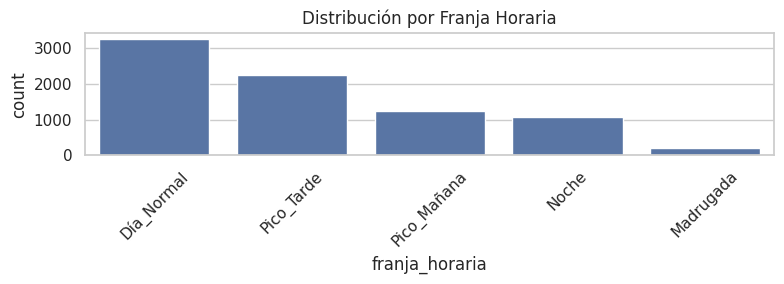

In [ ]:
# ============================
# CREAR 'franja_horaria' Y ONE-HOT ENCODING
# ============================

def crear_franca_y_onehot(df,
                          hora_col='horaregistro',
                          esquema='sugerido',
                          drop_original_hour=False,
                          drop_franca_after=False):
    """
    Crea columna 'franja_horaria' a partir de una columna de hora (0-23)
    y realiza One-Hot Encoding sobre ella.

    Parámetros:
    - df: DataFrame
    - hora_col: 'horaregistro' o 'Horaantencion' (columna fuente)
    - esquema: 'sugerido' o dict personalizado tipo { 'Nombre': (start,end), ... }
              los intervalos son inclusivos en start y end en horas enteras 0-23.
    - drop_original_hour: si True elimina la columna de hora original
    - drop_franca_after: si True elimina la columna franja original tras get_dummies
    """
    df = df.copy()

    # 1) Validar columna hora
    if hora_col not in df.columns:
        raise KeyError(f"La columna de hora '{hora_col}' no existe en el DataFrame.")

    # 2) Normalizar la columna hora (numérica y en rango 0-23)
    df[hora_col] = pd.to_numeric(df[hora_col], errors='coerce')
    # Si hay NaNs, mantendremos 'Missing_Franja'

    # 3) Definir esquema por defecto si se solicita
    if esquema == 'sugerido':
        # Intervalos [start, end] en horas enteras
        esquema_map = {
            'Madrugada': (0, 5),         # 00:00 - 05:59
            'Pico_Mañana': (6, 9),       # 06:00 - 09:59
            'Día_Normal': (10, 15),      # 10:00 - 15:59
            'Pico_Tarde': (16, 19),      # 16:00 - 19:59
            'Noche': (20, 23)            # 20:00 - 23:59
        }
    elif isinstance(esquema, dict):
        esquema_map = esquema
    else:
        raise ValueError("El parámetro 'esquema' debe ser 'sugerido' o un dict personalizado.")

    # 4) Función para asignar la franja
    def asignar_franja(h):
        if pd.isna(h):
            return 'Missing_Franja'
        try:
            h_int = int(h) % 24
        except Exception:
            return 'Missing_Franja'
        for name, (start, end) in esquema_map.items():
            # Soportar intervalos que no crucen medianoche (start <= end)
            if start <= end:
                if start <= h_int <= end:
                    return name
            else:
                # caso intervalo que cruza medianoche, ej (22, 3)
                if h_int >= start or h_int <= end:
                    return name
        return 'Other_Franja'

    # 5) Crear columna
    df['franja_horaria'] = df[hora_col].apply(asignar_franja).astype(str)
    # Normalizar nombres (opcional)
    df['franja_horaria'] = df['franja_horaria'].str.replace(" ", "_", regex=False)

    # 6) One-Hot Encoding
    dummies = pd.get_dummies(df['franja_horaria'], prefix='franja', dtype=int)
    df = pd.concat([df.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)

    # 7) Limpiezas opcionales
    if drop_original_hour:
        df.drop(columns=[hora_col], inplace=True)
    if drop_franca_after:
        df.drop(columns=['franja_horaria'], inplace=True)

    # 8) Resumen y visualización ligera
    print("'franja_horaria' creada a partir de:", hora_col)
    print("Columnas de franja creadas:", [c for c in df.columns if c.startswith('franja_')])
    print("\nDistribución de franjas (conteo):")
    display(df[['franja_horaria']].value_counts().rename_axis(['franja_horaria']).reset_index(name='count'))

    # Gráfica rápida
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x='franja_horaria', order=df['franja_horaria'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Distribución por Franja Horaria")
    plt.tight_layout()
    plt.show()

    return df

# ============================
# EJEMPLO DE USO
# ============================
# Usar horaregistro como fuente; si prefieres Horaantencion, pon hora_col='Horaantencion'
df = crear_franca_y_onehot(df, hora_col='horaregistro', esquema='sugerido', drop_original_hour=False, drop_franca_after=False)


## **5.12. Escalado y normalización de Varibles Numéricas con RobustScaler**



Columnas numéricas detectadas: ['annoregistro', 'mesregistro', 'diaregistro', 'horaregistro', 'annoatencion', 
'mesatencion', 'diaatencion', 'Horaantencion', 'TiempoAtencion', 'distancia', 'Abogadounico_freq', 'fin_de_semana']

Aplicando RobustScaler (robusto a outliers)...

Escalado completado para 12 columnas:

→ annoregistro, mesregistro, diaregistro, horaregistro, annoatencion, mesatencion, diaatencion, Horaantencion, 
TiempoAtencion, distancia, Abogadounico_freq, fin_de_semana

**Resumen comparativo (Antes vs Después del escalado):**

,Media Antes,Media Después,% Cambio Media,Desv.Std Antes,Desv.Std Después,% Cambio Desv.Std,Mín Antes,Mín Después,Máx Antes,Máx Después
annoregistro,2020.013000,0.003000,-100.00%,2.278000,0.569000,-75.00%,2016.000000,-1.000000,2025.000000,1.250000
mesregistro,6.832000,-0.028000,-100.41%,3.532000,0.589000,-83.33%,1.000000,-1.000000,12.000000,0.833000
diaregistro,15.870000,-0.008000,-100.05%,8.847000,0.553000,-93.75%,1.000000,-0.938000,31.000000,0.938000
horaregistro,14.081000,0.012000,-99.92%,4.715000,0.674000,-85.71%,0.000000,-2.000000,23.000000,1.286000
annoatencion,2020.021000,0.005000,-100.00%,2.277000,0.569000,-75.00%,2016.000000,-1.000000,2025.000000,1.250000
mesatencion,6.804000,-0.033000,-100.48%,3.522000,0.587000,-83.33%,1.000000,-1.000000,12.000000,0.833000
diaatencion,15.817000,-0.012000,-100.08%,8.864000,0.591000,-93.33%,1.000000,-1.000000,31.000000,1.000000
Horaantencion,14.584000,-0.052000,-100.36%,5.108000,0.638000,-87.50%,0.000000,-1.875000,23.000000,1.000000
TiempoAtencion,253.319000,1.985000,-99.22%,597.125000,5.238000,-99.12%,0.000000,-0.237000,3592.000000,31.272000
distancia,8483.656000,0.033000,-100.00%,299.146000,65.224000,-78.20%,1759.927000,-1465.980000,13230.958000,1035.113000


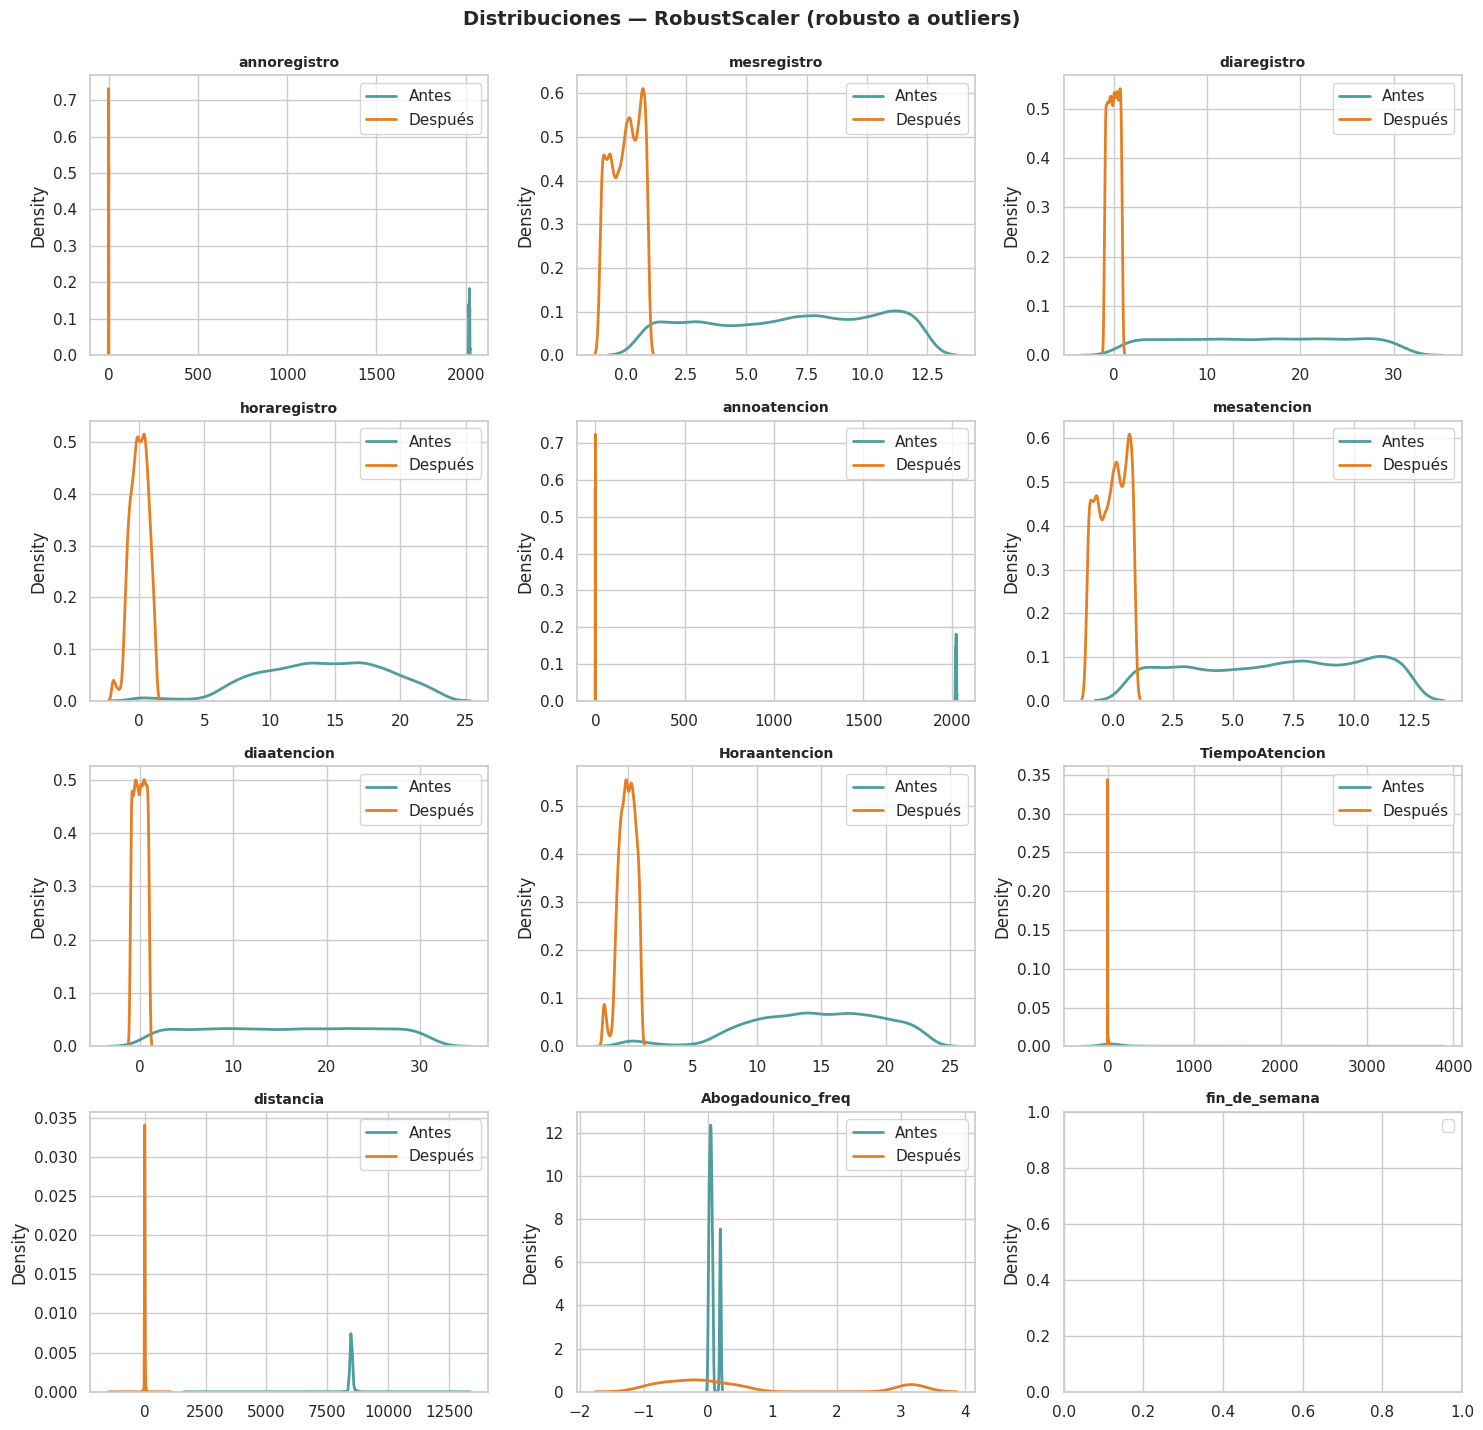

Vista previa de las variables escaladas:

,annoregistro,mesregistro,diaregistro,horaregistro,annoatencion,mesatencion,diaatencion,Horaantencion,TiempoAtencion,distancia,Abogadounico_freq,fin_de_semana
0,-1.0,-0.166667,-0.5,-0.714286,-1.0,-0.166667,-0.533333,-0.750,-0.236842,-0.194405,-0.162304,0.0
1,-1.0,-0.166667,-0.5,-0.428571,-1.0,-0.166667,-0.533333,-0.500,-0.236842,0.670323,-0.162304,0.0
2,-1.0,-0.166667,-0.5,0.000000,-1.0,-0.166667,-0.533333,-0.125,-0.236842,-0.147002,-0.162304,0.0
3,-1.0,-0.166667,-0.5,0.571429,-1.0,-0.166667,-0.533333,0.375,-0.236842,33.945465,-0.162304,0.0
4,-1.0,-0.166667,-0.5,0.714286,-1.0,-0.166667,-0.533333,0.500,-0.236842,-0.237897,-0.162304,0.0


In [ ]:
# =========================================================
# ESCALADO Y NORMALIZACIÓN DE VARIABLES NUMÉRICAS
# =========================================================

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def escalar_variables(df, num_cols_list=None, metodo='robust', mostrar_graficos=True):
    """
    Aplica escalado o normalización a las columnas numéricas del DataFrame,
    mostrando una tabla comparativa antes y después, y gráficos de distribución.
    Incluye cambio porcentual en media y desviación estándar.

    Parámetros:
    -----------
    df : pd.DataFrame
        Dataset de entrada
    num_cols_list : list
        Lista de columnas numéricas a escalar (si None, se detectan automáticamente)
    metodo : str
        Tipo de escalado ('standard', 'minmax', 'robust', 'normalize')
    mostrar_graficos : bool
        Si True, genera visualizaciones KDE antes y después del escalado
    """

    df_escalado = df.copy()

    # ======================
    # Selección de columnas numéricas
    # ======================
    if num_cols_list is None:
        num_cols_list = df_escalado.select_dtypes(include=[np.number]).columns.tolist()

    if not num_cols_list:
        print(" No se detectaron columnas numéricas para escalar.")
        return df_escalado

    # ======================
    # Selección del método
    # ======================
    if metodo == 'standard':
        scaler = StandardScaler()
        titulo = "StandardScaler (media=0, desviación=1)"
    elif metodo == 'minmax':
        scaler = MinMaxScaler()
        titulo = "MinMaxScaler (rango [0,1])"
    elif metodo == 'robust':
        scaler = RobustScaler()
        titulo = "RobustScaler (robusto a outliers)"
    elif metodo == 'normalize':
        scaler = Normalizer()
        titulo = "Normalizer (norma unitaria por fila)"
    else:
        raise ValueError("Método no válido. Usa: 'standard', 'minmax', 'robust' o 'normalize'.")

    print(f"Aplicando {titulo}...\n")

    # ======================
    # Aplicar escalado
    # ======================
    df_escalado[num_cols_list] = scaler.fit_transform(df_escalado[num_cols_list])

    print(f" Escalado completado para {len(num_cols_list)} columnas:")
    print("   →", ", ".join(num_cols_list))

    # =========================================================
    # TABLA COMPARATIVA ANTES vs DESPUÉS DEL ESCALADO
    # =========================================================
    resumen_antes = df[num_cols_list].describe().T
    resumen_despues = df_escalado[num_cols_list].describe().T

    comparativo = pd.DataFrame({
        'Media Antes': resumen_antes['mean'],
        'Media Después': resumen_despues['mean'],
        '% Cambio Media': ((resumen_despues['mean'] - resumen_antes['mean']) / resumen_antes['mean'] * 100),
        'Desv.Std Antes': resumen_antes['std'],
        'Desv.Std Después': resumen_despues['std'],
        '% Cambio Desv.Std': ((resumen_despues['std'] - resumen_antes['std']) / resumen_antes['std'] * 100),
        'Mín Antes': resumen_antes['min'],
        'Mín Después': resumen_despues['min'],
        'Máx Antes': resumen_antes['max'],
        'Máx Después': resumen_despues['max']
    }).round(3)

    print("\n **Resumen comparativo (Antes vs Después del escalado):**")
    display(
        comparativo.style
        .background_gradient(cmap="YlGnBu", axis=None)
        .format({'% Cambio Media': "{:.2f}%", '% Cambio Desv.Std': "{:.2f}%"})
    )

    # =========================================================
    # VISUALIZACIÓN COMPARATIVA (KDE)
    # =========================================================
    if mostrar_graficos:
        n = len(num_cols_list)
        n_cols_plot = 3
        n_rows_plot = (n // n_cols_plot) + (n % n_cols_plot > 0)

        plt.figure(figsize=(5 * n_cols_plot, 3.5 * n_rows_plot))
        sns.set_style("whitegrid")

        for i, col in enumerate(num_cols_list, start=1):
            plt.subplot(n_rows_plot, n_cols_plot, i)
            sns.kdeplot(df[col], label='Antes', color='#4F9D9D', lw=2)
            sns.kdeplot(df_escalado[col], label='Después', color='#E67E22', lw=2)
            plt.title(col, fontsize=10, fontweight='bold')
            plt.legend()
            plt.xlabel('')
            plt.tight_layout()

        plt.suptitle(f"Distribuciones — {titulo}", fontsize=14, fontweight='bold', y=1.02)
        plt.show()

    return df_escalado


# =========================================================
# LLAMADO AUTOMÁTICO A LA FUNCIÓN (ADAPTADO A TU NOTEBOOK)
# =========================================================
# Usar el DataFrame actual (puede ser df, df_limpio, df_imputado, etc.)
if 'df' in locals() or 'df' in globals():
    num_cols_current = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f" Columnas numéricas detectadas: {num_cols_current}\n")

    df_escalado = escalar_variables(
        df=df,
        num_cols_list=num_cols_current,
        metodo='robust',        # Cambia a 'standard', 'minmax' o 'normalize' si deseas
        mostrar_graficos=True
    )

    print("\n Vista previa de las variables escaladas:")
    display(df_escalado[num_cols_current].head())
else:
    print("Error: el DataFrame 'df' no está definido.")
    df_escalado = pd.DataFrame()


## **5.13. Validación Final del Dataset Limpio**

In [ ]:
# =========================================================
# VALIDACIÓN FINAL DEL DATASET LIMPIO
# =========================================================

print("\n [VALIDACIÓN FINAL DEL DATASET LIMPIO]\n")

# ---------------------------------------------------------
# 1️ Revisión general del dataframe
# ---------------------------------------------------------
print("Dimensiones del dataset:")
print(f"Filas: {df_feat_engineered.shape[0]} | Columnas: {df_feat_engineered.shape[1]}")

print("\n Tipos de datos por columna:")
display(df_feat_engineered.dtypes.value_counts())

# ---------------------------------------------------------
# 2️ Revisión de valores nulos
# ---------------------------------------------------------
print("\nValores nulos totales por columna:")
missing = df_feat_engineered.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if missing.empty:
    print(" No hay valores nulos en el dataset.")
else:
    display(pd.DataFrame({
        "Valores Nulos": missing,
        "Porcentaje (%)": (missing / len(df_feat_engineered) * 100).round(2)
    }))

# ---------------------------------------------------------
# 3️ Duplicados
# ---------------------------------------------------------
duplicates = df_feat_engineered.duplicated().sum()
if duplicates == 0:
    print("\n No se encontraron registros duplicados.")
else:
    print(f"\n Se encontraron {duplicates} registros duplicados. Considera eliminarlos.")

# ---------------------------------------------------------
# 4️ Validación de valores numéricos
# ---------------------------------------------------------
numeric_cols = df_feat_engineered.select_dtypes(include=['int64','float64']).columns

print("\n Estadísticas descriptivas de variables numéricas:")
display(df_feat_engineered[numeric_cols].describe().T)

# ---------------------------------------------------------
# 5️ Validación de variables categóricas
# ---------------------------------------------------------
cat_cols = df_feat_engineered.select_dtypes(include=['object','category']).columns

print("\n Resumen de variables categóricas:")
cat_summary = pd.DataFrame({
    'Tipo': df_feat_engineered[cat_cols].dtypes,
    'Valores únicos': [df_feat_engineered[c].nunique() for c in cat_cols],
    'Valores más frecuentes': [df_feat_engineered[c].value_counts().index[0] if df_feat_engineered[c].nunique() > 0 else None for c in cat_cols]
})
display(cat_summary.sort_values(by='Valores únicos', ascending=False))

# ---------------------------------------------------------

# ---------------------------------------------------------
# 6 Confirmación final
# ---------------------------------------------------------
print("\n VALIDACIÓN COMPLETADA")
print("El dataset está listo para las etapas de análisis exploratorio o modelado predictivo.")


[VALIDACIÓN FINAL DEL DATASET LIMPIO]

Dimensiones del dataset:

Filas: 8040 | Columnas: 40

Tipos de datos por columna:

,count
float64,9
datetime64[ns],8
object,6
int64,5
category,4
category,1
category,1
category,1
category,1
category,1


Valores nulos totales por columna:

,Valores Nulos,Porcentaje (%)
ResultadoFallo,7995,99.44
LiberaVehiculo,7897,98.22
clienteimportante,7674,95.45
Abogadounico_freq,372,4.63


No se encontraron registros duplicados.

Estadísticas descriptivas de variables numéricas:

,count,mean,std,min,25%,50%,75%,max
annoregistro,8040.0,2020.012562,2.277538,2016.000000,2018.000000,2020.000000,2022.000000,2025.000000
mesregistro,8040.0,6.831965,3.531987,1.000000,4.000000,7.000000,10.000000,12.000000
diaregistro,8040.0,15.869900,8.846973,1.000000,8.000000,16.000000,24.000000,31.000000
horaregistro,8040.0,14.081219,4.715200,0.000000,11.000000,14.000000,18.000000,23.000000
annoatencion,8040.0,2020.020647,2.276523,2016.000000,2018.000000,2020.000000,2022.000000,2025.000000
mesatencion,8040.0,6.803980,3.521990,1.000000,4.000000,7.000000,10.000000,12.000000
diaatencion,8040.0,15.817040,8.863927,1.000000,8.000000,16.000000,23.000000,31.000000
Horaantencion,8040.0,14.583831,5.107983,0.000000,11.000000,15.000000,19.000000,23.000000
TiempoAtencion,8040.0,253.318905,597.125482,0.000000,12.000000,27.000000,126.000000,3592.000000
distancia,8040.0,8483.655926,299.145664,1759.926915,8482.212922,8483.506851,8486.799330,13230.957749


Resumen de variables categóricas:

,Tipo,Valores únicos,Valores más frecuentes
RandomAbogado,category,8,JOHAN ALEXANDER MESA RIVERA
diasemana,category,7,Viernes
UsuarioRegistra,category,7,Elkin Lezcano
franja_horaria,object,5,Día Normal
Instancia,object,5,SIMPLE
Municipio,object,5,Medellín
Municipio_top,object,5,Medellín
ResultadoFallo,category,4,FALLO EN CONTRA
Lluvia,object,3,no
clienteimportante,category,3,LIBERTY SEGUROS S.A.


VALIDACIÓN COMPLETADA

El dataset está listo para las etapas de análisis exploratorio o modelado predictivo.

In [ ]:
#Guardar DataSet escalado final
df_feat_engineered.to_excel("Dataset_final_escalado.xlsx", index=False)